In [ ]:
!pip install --upgrade pandas_profiling --user

     |████████████████████████████████| 266kB 2.7MB/s 
     |████████████████████████████████| 71kB 5.7MB/s 
     |████████████████████████████████| 604kB 7.9MB/s 
     |████████████████████████████████| 71kB 5.5MB/s 
     |████████████████████████████████| 71kB 5.4MB/s 
     |████████████████████████████████| 3.1MB 13.3MB/s 
     |████████████████████████████████| 296kB 31.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=ca462f154fde904cb59d579fc8276a752479a11f7621fe821ea571d06250eed2
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291991 sha256=5d55333f3f2f6012c7304ddfb7b7ca1a8060075a4f5a64f7ba65253f175e869d
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin imagehash
  Consider adding this directory to PATH or, if yo

In [ ]:
!pip install bds_courseware

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas_profiling
from google.colab import drive
from urllib.request import urlopen
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from bds_courseware import get_dataset
from bds_courseware.__ids import __datasets 
from bds_courseware._utils import _read_drive_data as read_data
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
import requests
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import itertools
from tqdm.notebook import tqdm as tqdm
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score, silhouette_samples, classification_report, confusion_matrix, roc_auc_score, roc_curve
from scipy.spatial.distance import pdist, mahalanobis, squareform
from sklearn.svm import SVC,OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [249]:
len(data.drop_duplicates('LB'))

48

#Auxilarity methods

In [ ]:
def linreg_scores(data):
  target1 = data['Target'].values
  train_X, val_X, train_y, val_y = train_test_split(data.drop(['Time','Target'], axis=1), target1, 
                                                    random_state=SEED, shuffle=False, test_size = 0.2)
  linreg = LinearRegression()
  linreg.fit(train_X, train_y)
  predictions = linreg.predict(val_X)

  r2 = metrics.r2_score(val_y, predictions)
  rmse = np.sqrt(metrics.mean_squared_error(val_y, predictions))

  return np.array(predictions), pd.DataFrame.from_dict({'R2':r2, 'RMSE':rmse}, orient='index', columns=['Score'])

In [ ]:
def linreg_scores_without_time(data):
  target1 = data['Target'].values
  train_X, val_X, train_y, val_y = train_test_split(data.drop(['Target'], axis=1), target1, 
                                                    random_state=SEED, shuffle=False, test_size = 0.2)
  linreg = LinearRegression()
  linreg.fit(train_X, train_y)
  predictions = linreg.predict(val_X)

  r2 = metrics.r2_score(val_y, predictions)
  rmse = np.sqrt(metrics.mean_squared_error(val_y, predictions))

  return np.array(predictions), pd.DataFrame.from_dict({'R2':r2, 'RMSE':rmse}, orient='index', columns=['Score'])

In [ ]:
def check_normality(data,feat):
  stat, p = st.normaltest(data)
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
    print('Нельзя отвергнуть гипотезу о нормальности выборки по признаку \'%s\'' % (feat))
  else:
    print('Гипотеза о нормальности выборки по признаку \'%s\'должна быть отклонена' % (feat))

In [ ]:
def plot_scatter(feat1, feat2, data, hue=None, legend=False):
  plt.figure(figsize=(15, 10))
  g = sns.scatterplot(x=feat1,y=feat2,data=data, hue=hue,legend=legend)
  if legend!=False:
    g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)
  plt.ylabel(feat2)
  plt.xlabel(feat1)
  plt.title('Точечный график для {0} и {1}'.format(feat1,feat2),fontdict={'fontsize':25})
  plt.show()

In [ ]:
def plot_hist(feat1,data,bins=15,feat2=None):
  plt.figure(figsize=(15, 5))
  sns.histplot(x=feat1,hue=feat2,data=data, bins=bins, kde=False)
  plt.ylabel('count')
  plt.title('Гистограмма для признака {}'.format(feat1))
  plt.show()

In [ ]:
def plot_hist_out(feat,data,bins=15):
  plt.figure(figsize=(15, 5))
  g = sns.FacetGrid(data, col="outlier",size=6)
  g = g.map(plt.hist, feat, density=True, bins=bins)
  plt.show()

In [ ]:
def plot_facet_grid_hist(col,row,hue,feat,data):
  sns.set(font_scale=2)
  plt.figure(figsize=(30, 50))
  g = sns.FacetGrid(
      data,
      col=col,
      row=row,
      sharex=False,
      sharey=False,
      height=10,
      aspect=2,
      hue=hue
  )
  g = g.map(plt.hist, feat).add_legend()
  plt.show()

In [ ]:
def plot_box(feat1,data,feat2=None,):
  plt.figure(figsize=(10,5))
  sns.boxplot(x=feat2,y=feat1, data=data)
  plt.title('Ящик(и) с усами для признака {}'.format(feat1))
  plt.show()

In [ ]:
def check_significance(feat,data):
  stat, p = st.ks_2samp(data[data.outlier==0][feat].dropna(), data[data.outlier==1][feat].dropna())
  alpha = 0.05
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  if p > alpha:
    print('Нельзя отвергнуть гипотезу о том, что выборки c таргетами {0} и {1} взяты из одного распределения'.format(0,1))
  else:
    print('Гипотеза о том, что выборки c таргетами {0} и {1}  взяты из одного распределения должна быть отклонена'.format(0,1))

In [ ]:
def plot_dist_categ(feat1, data,feat2=None):
  plt.figure(figsize=(25, 5))
  sns.countplot(x=feat1, data=data,hue=feat2)
  plt.title('График распределения значений для переменной {}'.format(feat1))
  plt.show()

In [ ]:
def report(y_data, predictions, outlier_label =-1):
  predictions = predictions.copy()

  predictions[predictions != outlier_label] = 0
  predictions[predictions == outlier_label] = 1


  print(classification_report(y_data, predictions))

In [ ]:
def calc_and_plot_rocauc(clf_probs,y_test,clf_name):
  ns_probs = [0 for _ in range(len(y_test))]
  # calculate scores
  ns_auc = roc_auc_score(y_test, ns_probs)
  clf_auc = roc_auc_score(y_test, clf_probs[:, 1])
  # summarize scores
  print('No Skill: ROC AUC=%.3f' % (ns_auc))
  print('{0}: ROC AUC={1}'.format(clf_name,clf_auc))
  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  clf_fpr, clf_tpr, _ = roc_curve(y_test, clf_probs[:,1])
  # plot the roc curve for the model
  plt.figure(figsize=(10, 8))
  plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(clf_fpr, clf_tpr, marker='.', label=clf_name)
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

#Read the data

In [ ]:
data = pd.read_csv('gdrive/My Drive/epam/Module 9/data/Cardiotocography.csv',sep=',', index_col='id')

In [ ]:
data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
id,,,,,,,,,,,,,,,,,,,,,,
1881.0,0.592593,0.000000,0.000000,0.294118,0.633803,0.338235,0.000000,0.013807,0.500000,0.0,0.000000,0.595376,0.045872,0.336207,0.333333,0.1,0.485149,0.247423,0.284091,0.638418,1.0,b'yes'
421.0,0.574074,0.038462,0.000000,0.000000,0.816901,0.029412,0.527473,0.092702,0.000000,0.0,0.000000,0.364162,0.770642,0.672414,0.166667,0.0,0.534653,0.587629,0.511364,0.016949,0.0,b'yes'
92.0,0.777778,0.000000,0.000000,0.000000,0.774648,0.029412,0.736264,0.096647,0.000000,0.0,0.000000,0.069364,0.816514,0.275862,0.222222,0.0,0.633663,0.659794,0.602273,0.000000,1.0,b'yes'
1767.0,0.259259,0.000000,0.000000,0.294118,0.704225,0.191176,0.000000,0.183432,0.428571,0.0,0.333333,0.473988,0.174312,0.275862,0.222222,0.1,0.000000,0.164948,0.000000,0.361582,0.0,b'yes'
1880.0,0.592593,0.000000,0.001773,0.294118,0.633803,0.352941,0.000000,0.013807,0.428571,0.0,0.333333,0.595376,0.045872,0.336207,0.333333,0.1,0.485149,0.226804,0.272727,0.683616,1.0,b'yes'


In [ ]:
data.outlier = pd.Series([1 if out=='b\'yes\'' else 0 for out in data.outlier])

#EDA + Data preparation + Feature engineering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16790 entries, 1881.0 to 2126.0
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        16790 non-null  float64
 1   AC        16790 non-null  float64
 2   FM        16790 non-null  float64
 3   UC        16790 non-null  float64
 4   ASTV      16790 non-null  float64
 5   MSTV      16790 non-null  float64
 6   ALTV      16790 non-null  float64
 7   MLTV      16790 non-null  float64
 8   DL        16790 non-null  float64
 9   DS        16790 non-null  float64
 10  DP        16790 non-null  float64
 11  Width     16790 non-null  float64
 12  Min       16790 non-null  float64
 13  Max       16790 non-null  float64
 14  Nmax      16790 non-null  float64
 15  Nzeros    16790 non-null  float64
 16  Mode      16790 non-null  float64
 17  Mean      16790 non-null  float64
 18  Median    16790 non-null  float64
 19  Variance  16790 non-null  float64
 20  Tendency  16790 non-

In [ ]:
data[data.outlier==0].duplicated().value_counts()

False    16353
True         2
dtype: int64

In [ ]:
data[data.outlier==1].duplicated().value_counts()

False    435
dtype: int64

В данных нет пропущенных значений. Но есть дубликаты среди таргета 0. Удалим их



In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.describe()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
count,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000,16788.000000
mean,0.483490,0.129658,0.011467,0.227628,0.426197,0.179676,0.064923,0.170330,0.113834,0.000774,0.017493,0.391622,0.379300,0.366289,0.230969,0.033542,0.564126,0.525633,0.475335,0.091368,0.670509,0.025911
std,0.175676,0.143297,0.060675,0.156435,0.217037,0.121396,0.147060,0.114611,0.172201,0.027817,0.085144,0.215283,0.252120,0.153148,0.159264,0.069353,0.128390,0.136349,0.146714,0.119932,0.295381,0.158876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.351852,0.000000,0.000000,0.117647,0.236111,0.088235,0.000000,0.094675,0.000000,0.000000,0.000000,0.204819,0.155963,0.258621,0.111111,0.000000,0.483051,0.431193,0.373494,0.015385,0.500000,0.000000
50%,0.481481,0.076923,0.000000,0.235294,0.408451,0.161765,0.000000,0.155819,0.000000,0.000000,0.000000,0.378698,0.371560,0.353448,0.222222,0.000000,0.567797,0.525773,0.478261,0.045198,0.500000,0.000000
75%,0.592593,0.192308,0.003546,0.304348,0.611111,0.220588,0.050633,0.224852,0.214286,0.000000,0.000000,0.549708,0.596330,0.456897,0.333333,0.000000,0.650000,0.621053,0.576087,0.123077,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Исходя из статистических значений, можно сделать вывод что в данных действительно есть выбросы - много признаков, где максимум значительно отличается от 3-го квантиля. Но возможно это неправда из-за особенностей данных.

##Univariate analysis

###LB - FHR baseline (beats per minute)

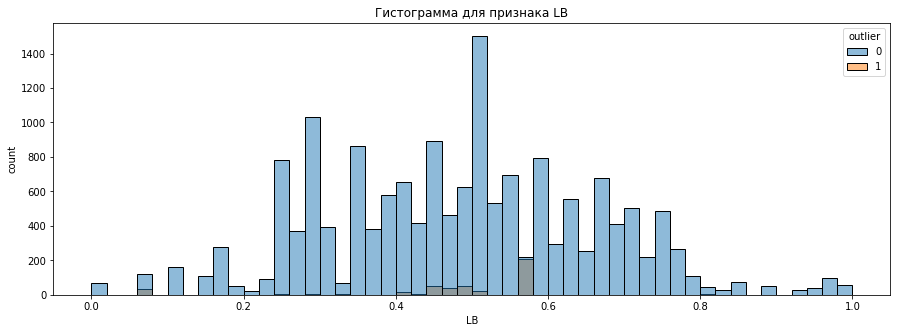

In [ ]:
plot_hist('LB', data, bins=50, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

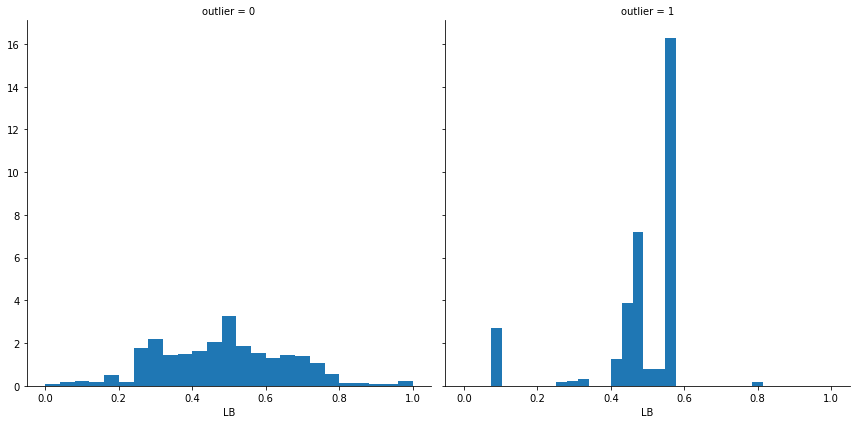

In [ ]:
plot_hist_out('LB',data,bins=25)

Распределение не подчинено нормальному, но у выбросов намного меньше значений этого признака

Проверим значимость различия между выборками, взятыми по таргету

In [ ]:
data.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,outlier
id,,,,,,,,,,,,,,,,,,,,,,
1881.0,0.592593,0.000000,0.000000,0.294118,0.633803,0.338235,0.000000,0.013807,0.500000,0.0,0.000000,0.595376,0.045872,0.336207,0.333333,0.1,0.485149,0.247423,0.284091,0.638418,1.0,0
421.0,0.574074,0.038462,0.000000,0.000000,0.816901,0.029412,0.527473,0.092702,0.000000,0.0,0.000000,0.364162,0.770642,0.672414,0.166667,0.0,0.534653,0.587629,0.511364,0.016949,0.0,0
92.0,0.777778,0.000000,0.000000,0.000000,0.774648,0.029412,0.736264,0.096647,0.000000,0.0,0.000000,0.069364,0.816514,0.275862,0.222222,0.0,0.633663,0.659794,0.602273,0.000000,1.0,0
1767.0,0.259259,0.000000,0.000000,0.294118,0.704225,0.191176,0.000000,0.183432,0.428571,0.0,0.333333,0.473988,0.174312,0.275862,0.222222,0.1,0.000000,0.164948,0.000000,0.361582,0.0,0
1880.0,0.592593,0.000000,0.001773,0.294118,0.633803,0.352941,0.000000,0.013807,0.428571,0.0,0.333333,0.595376,0.045872,0.336207,0.333333,0.1,0.485149,0.226804,0.272727,0.683616,1.0,0


In [ ]:
check_significance('LB',data)

Statistics=0.300, p=0.000
Гипотеза о том, что выборки c таргетами 0 и 1  взяты из одного распределения должна быть отклонена


Как видим, различие в выборках значимо, но это скорее всего ничего на значит поскольку в данных присутствует имбаланс и дальше данный критерий проверять не будем.

###AC - baseline of accelerations per second

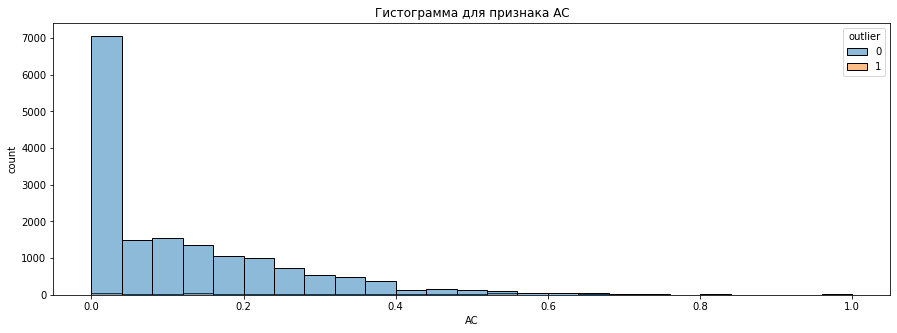

In [ ]:
plot_hist('AC', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

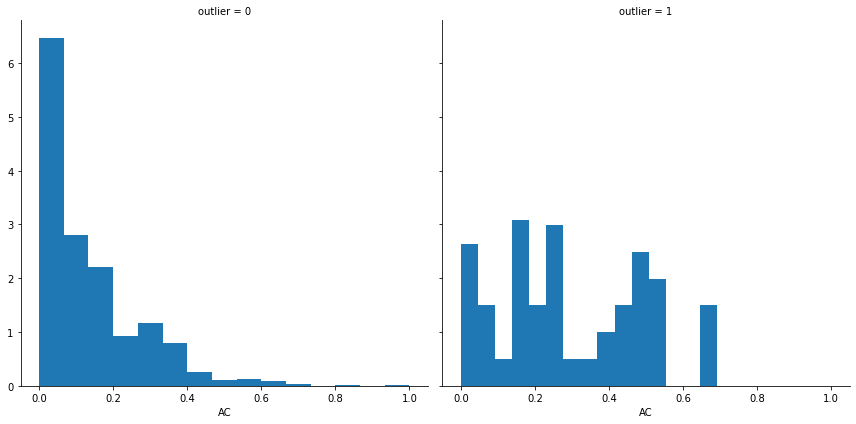

In [ ]:
plot_hist_out('AC',data)

Распределение не подчинено нормальному и график выбросов не выделяется

###FM - baseline of fetal movements per second

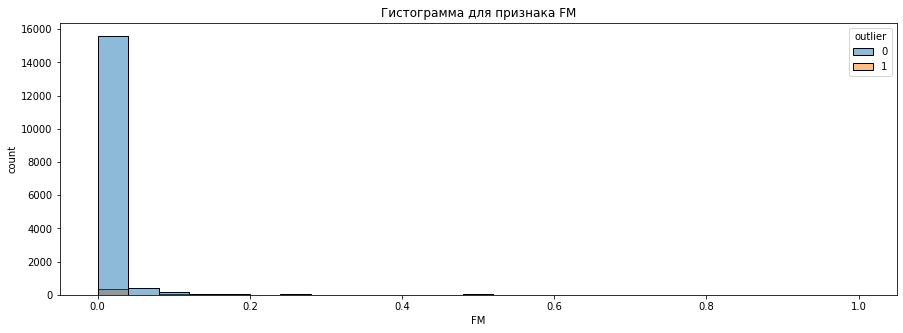

In [ ]:
plot_hist('FM', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

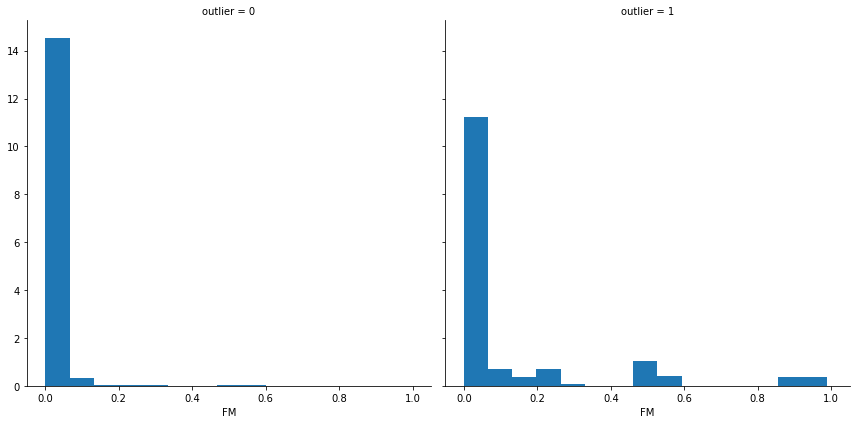

In [ ]:
plot_hist_out('FM',data)

Видим, что у таргета 0 значения данного признака близки к 0, а у выбросов есть и другие значения.

###UC - baseline of uterine contractions per second

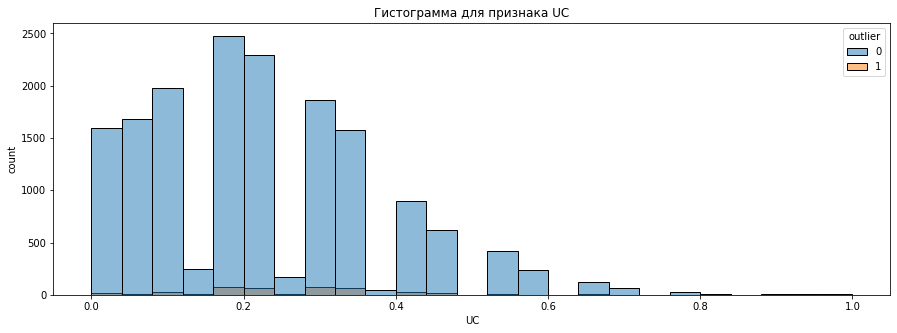

In [ ]:
plot_hist('UC', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

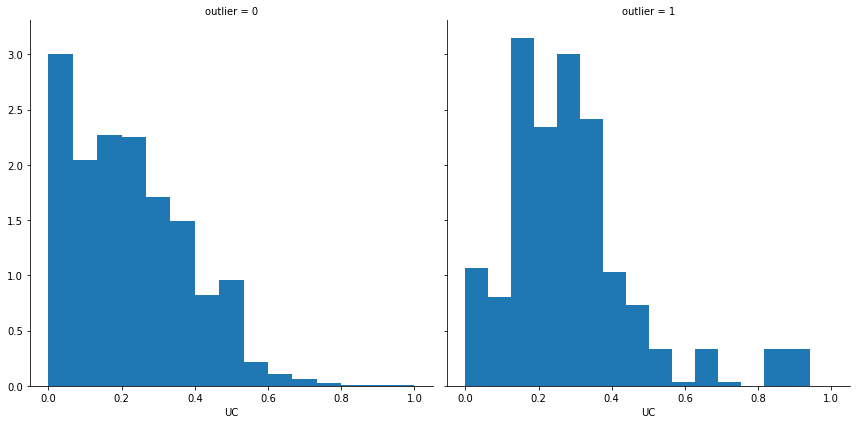

In [ ]:
plot_hist_out('UC',data)

Значения таргета 1 более ограничены чем таргета 0.

###DL - baseline of light decelerations per second

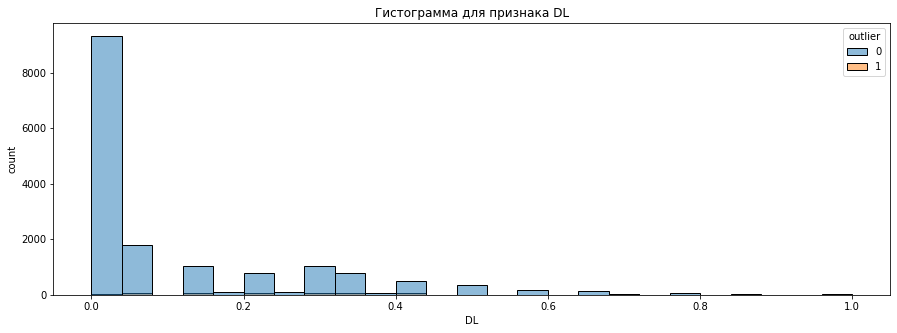

In [ ]:
plot_hist('DL', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

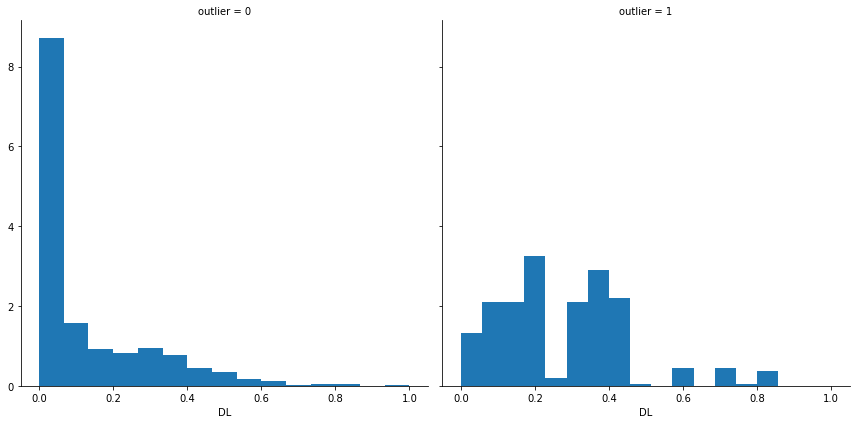

In [ ]:
plot_hist_out('DL',data)

Нет значимых отличий между выборками.

###DS - baseline of severe decelerations per second

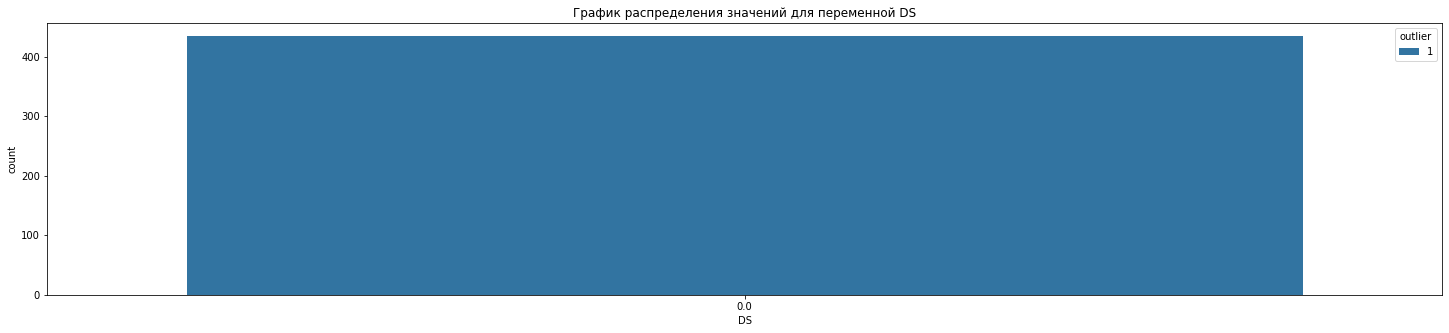

In [ ]:
plot_dist_categ('DS', data[data.outlier==1], feat2 = 'outlier')

Все выбросы имеют значение данного признака 0.

###DP - baseline of prolongued decelerations per second

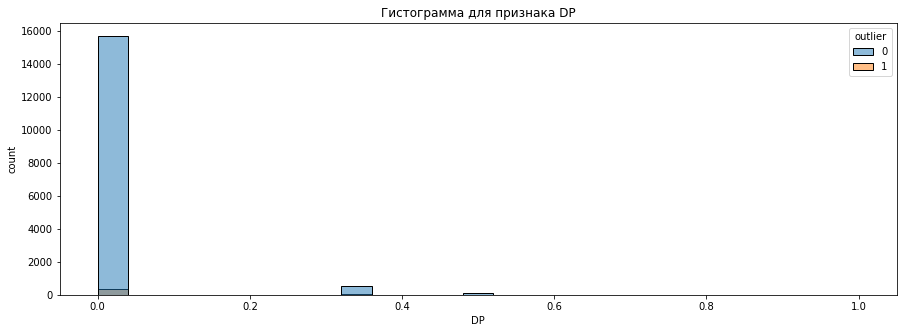

In [ ]:
plot_hist('DP', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

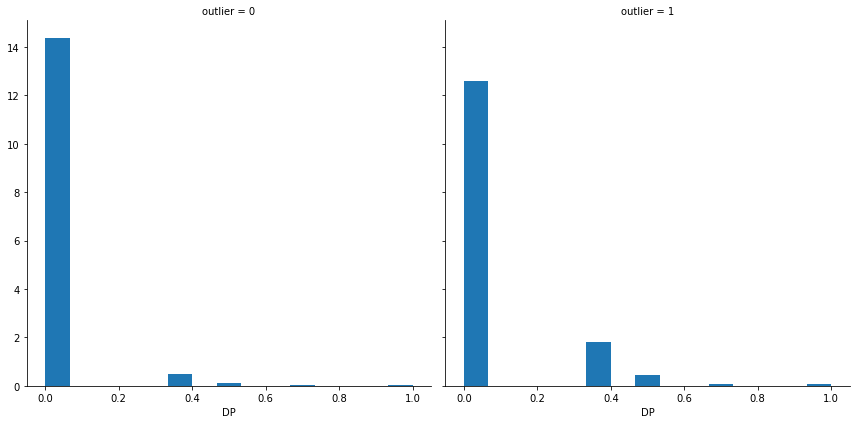

In [ ]:
plot_hist_out('DP',data)

Нет значимых отличий между выборками.

###ASTV - percentage of time with abnormal short term variability

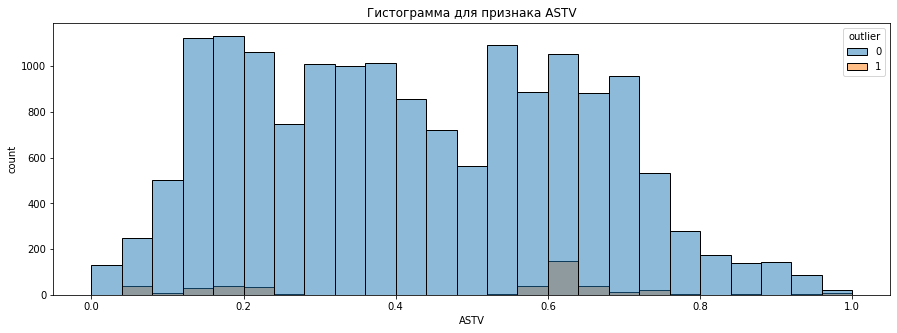

In [ ]:
plot_hist('ASTV', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

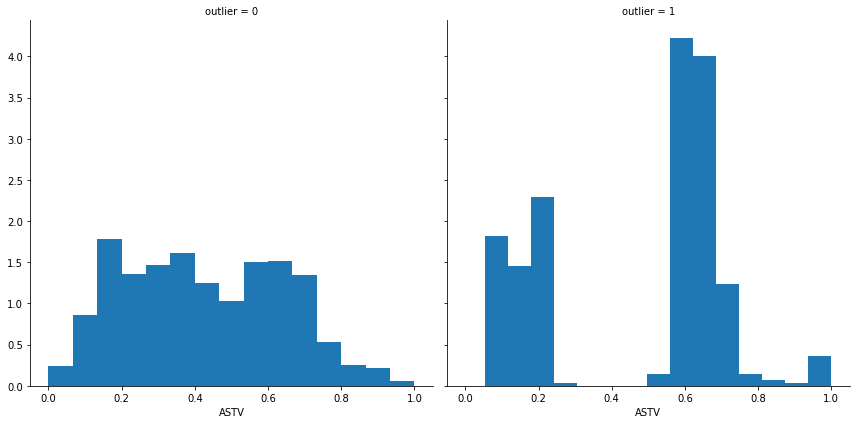

In [ ]:
plot_hist_out('ASTV',data)

При таргете 1 у данного признака значительно меньше значений.

###MSTV - mean value of short term variability

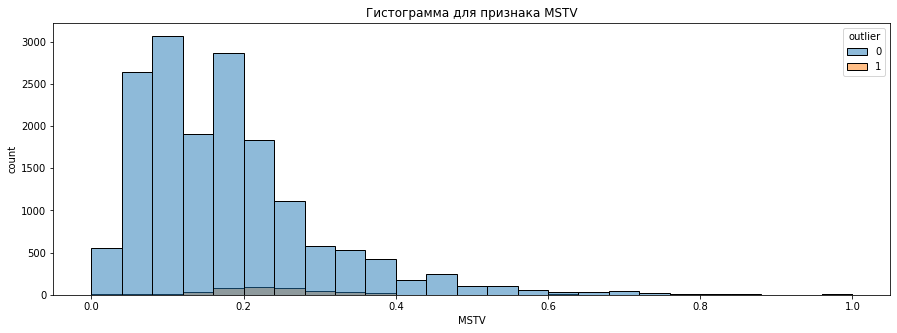

In [ ]:
plot_hist('MSTV', data, bins=25, feat2 = 'outlier')

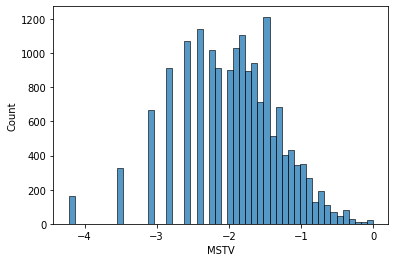

In [ ]:
sns.histplot(np.log(data[data.MSTV!=0]['MSTV']),bins=50)

Похоже, что данный признак имеет логнормальное распределение. Поэтому заменим его значения на значения логарифма.

In [ ]:
data.MSTV=pd.Series([0.000001 if ms==0 else ms for ms in data.MSTV])

In [ ]:
data.MSTV=np.log(data.MSTV)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

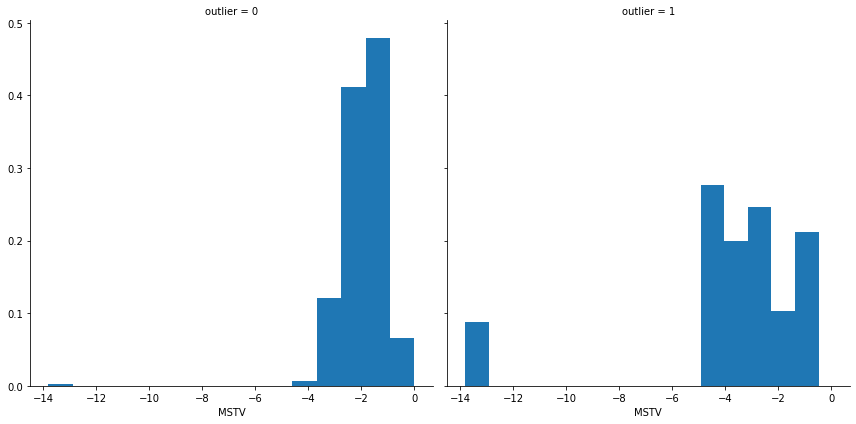

In [ ]:
plot_hist_out('MSTV',data)

Видим, что у таргета 1 есть значения выходящие за -10

###ALTV - percentage of time with abnormal long term variability

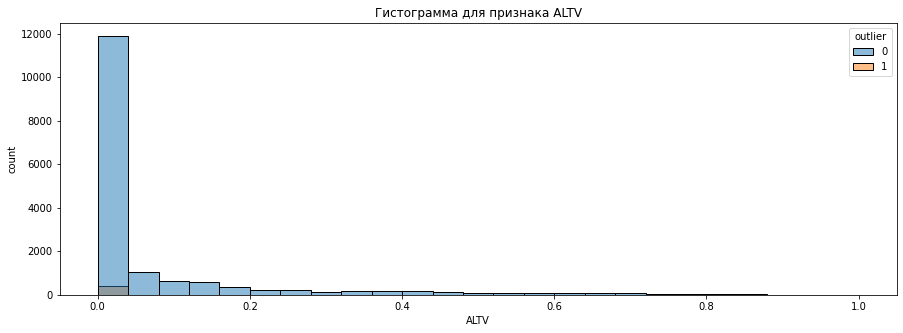

In [ ]:
plot_hist('ALTV', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

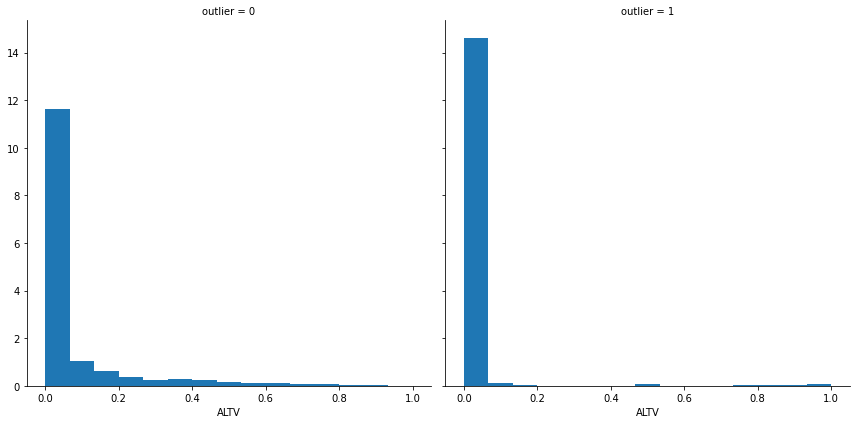

In [ ]:
plot_hist_out('ALTV',data)

Значимых различий в графиках нет.

###MLTV - mean value of long term variability

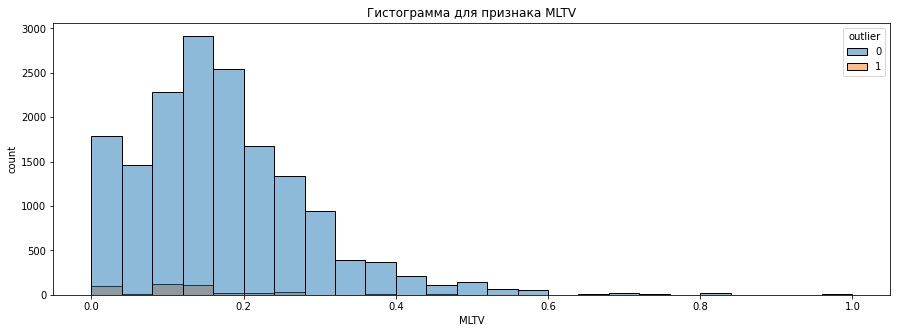

In [ ]:
plot_hist('MLTV', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

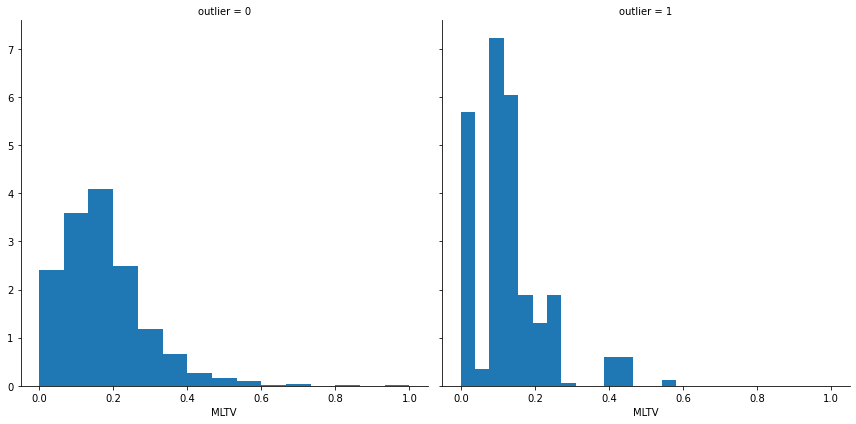

In [ ]:
plot_hist_out('MLTV',data)

Графики напоминают логнормальное распределение.

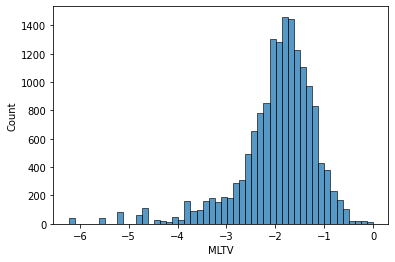

In [ ]:
sns.histplot(np.log(data[data.MLTV!=0]['MLTV']),bins=50)

Похоже, что данный признак имеет логнормальное распределение. Поэтому заменим его значения на значения логарифма.

In [ ]:
data.MLTV=pd.Series([0.000001 if ms==0 else ms for ms in data.MLTV])

In [ ]:
data.MLTV=np.log(data.MLTV)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

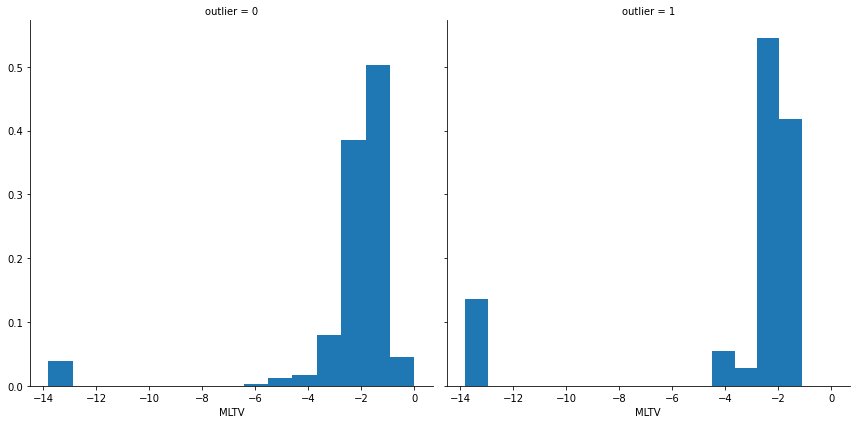

In [ ]:
plot_hist_out('MLTV',data)

Значимых различий в графиках нет.

###Width - width of FHR histogram

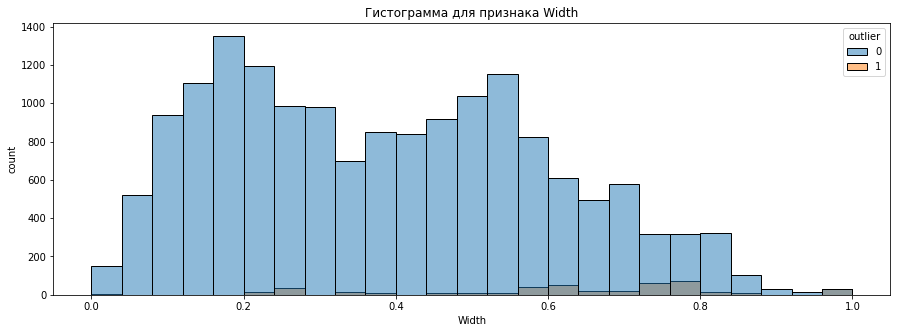

In [ ]:
plot_hist('Width', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

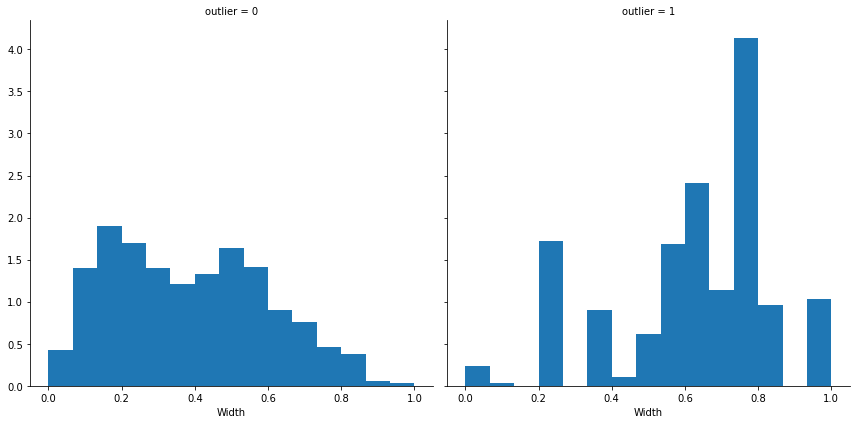

In [ ]:
plot_hist_out('Width',data)

У таргета 1 распределение у данного признака смещено влево.

###Min - minimum of FHR histogram

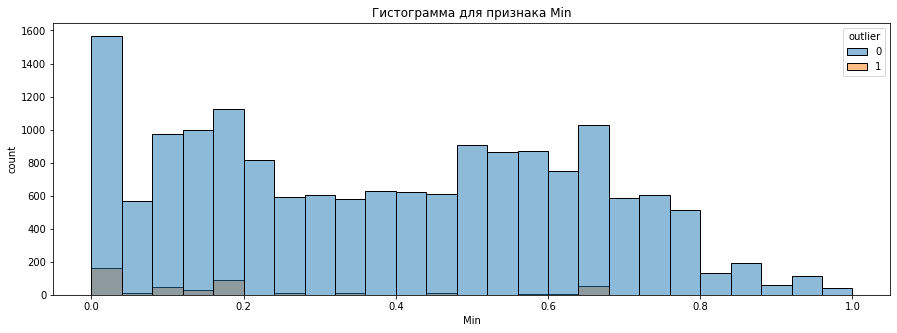

In [ ]:
plot_hist('Min', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

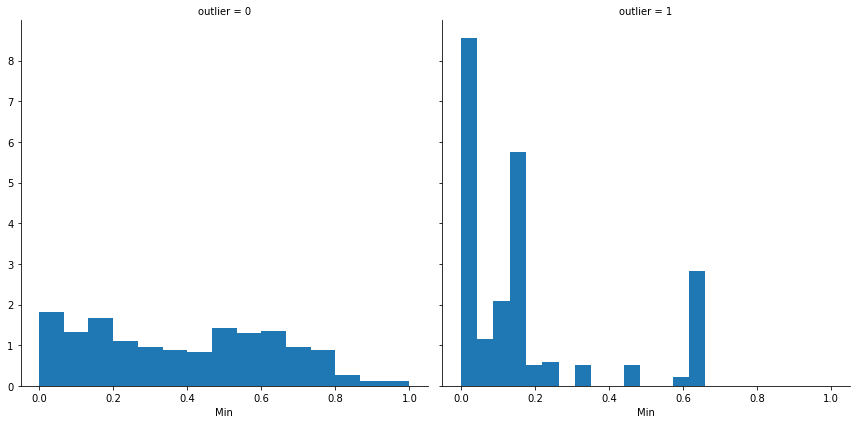

In [ ]:
plot_hist_out('Min',data)

Выидим, что распределения отличаются,но значимых различий между графиками не наблюдается.

###Max - Maximum of FHR histogram

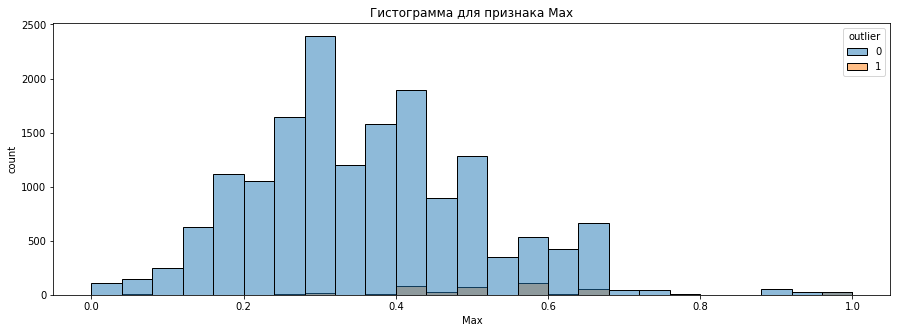

In [ ]:
plot_hist('Max', data, bins=25, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

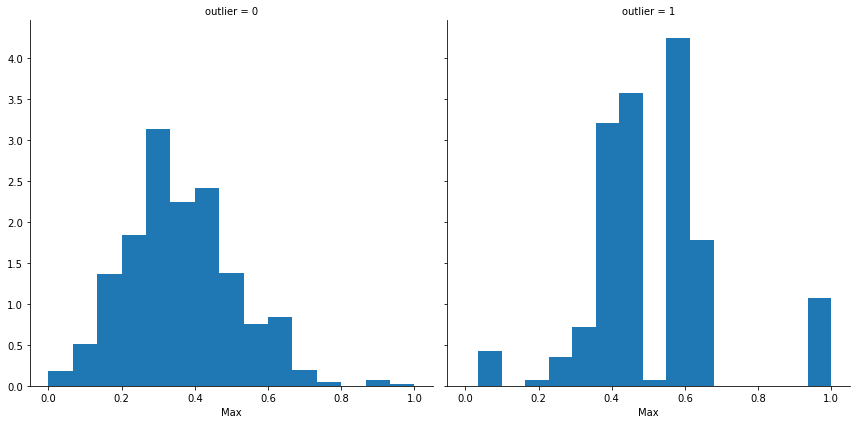

In [ ]:
plot_hist_out('Max',data)

Распределение для таргета 0 напоминает нормальное.

###NMax - Maximum of histogram peaks

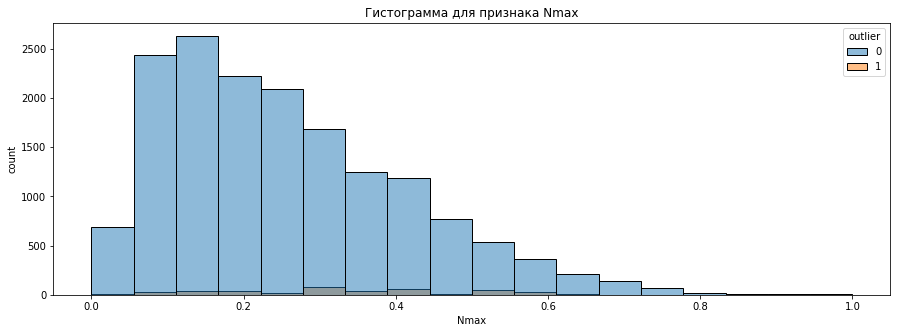

In [ ]:
plot_hist('Nmax', data, bins=18, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

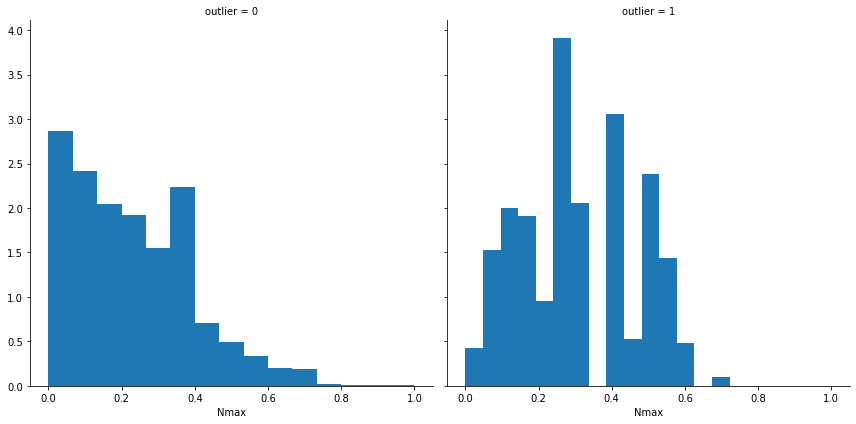

In [ ]:
plot_hist_out('Nmax',data)

Графики напоминают логнормальное распределение.

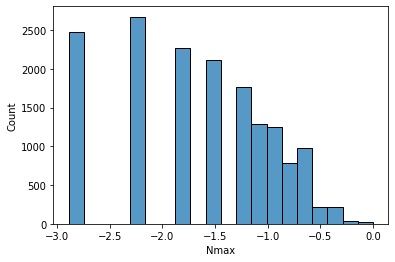

In [ ]:
sns.histplot(np.log(data[data.Nmax!=0]['Nmax']),bins=20)

К сожалению, сделанное выше предположение оказалось ошибочным.

###Nzeros - Maximum of histogram zeros

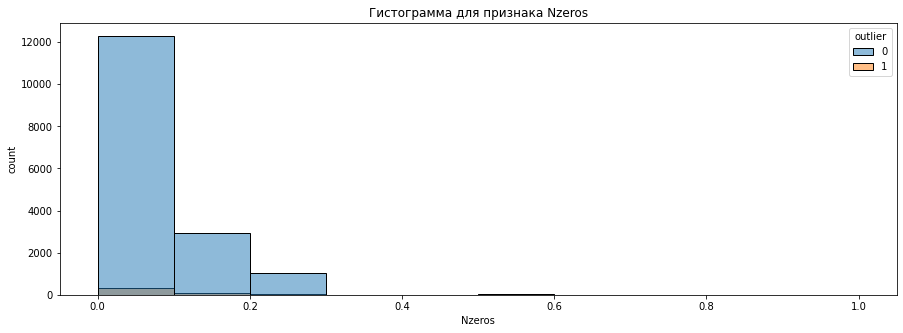

In [ ]:
plot_hist('Nzeros', data, bins=10, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

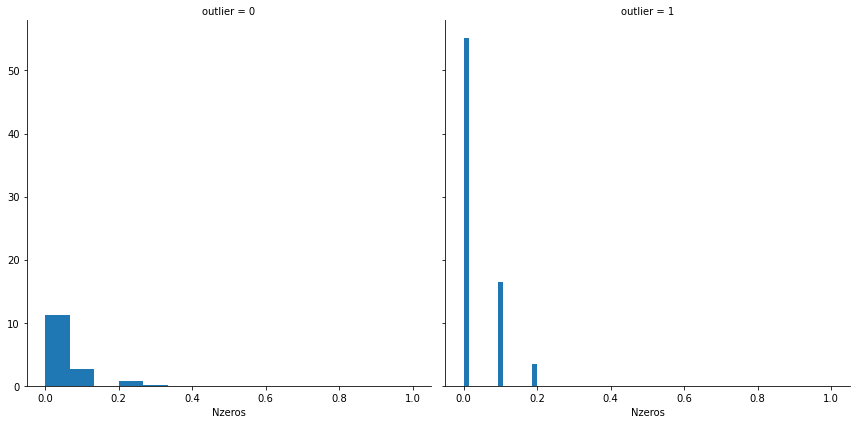

In [ ]:
plot_hist_out('Nzeros',data)

Между графиками нет значимых различий.

###Mode - histogram mode

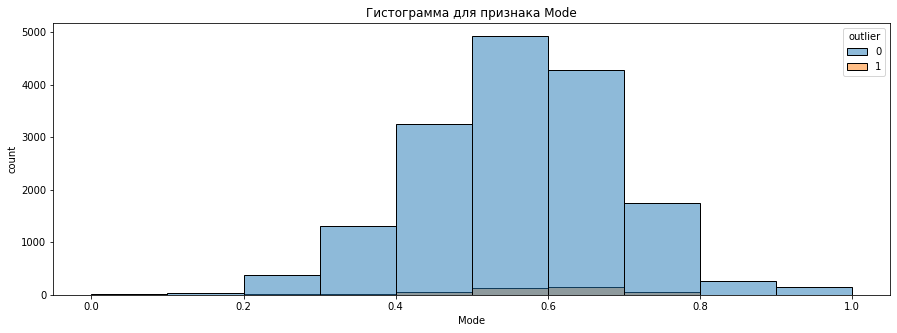

In [ ]:
plot_hist('Mode', data, bins=10, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

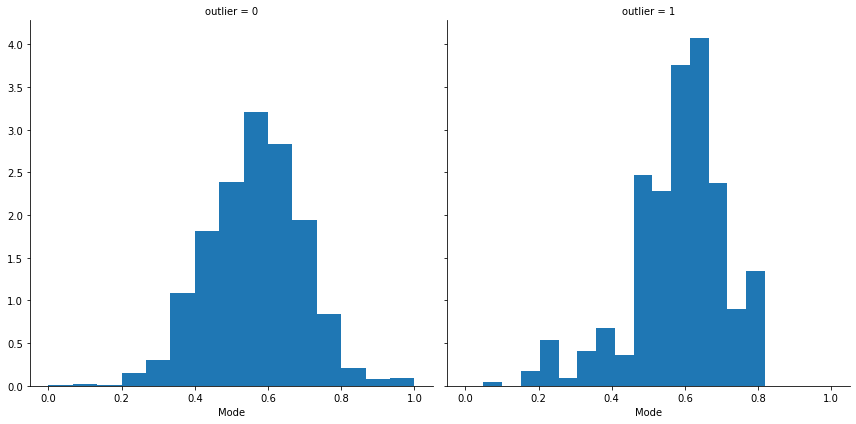

In [ ]:
plot_hist_out('Mode',data)

Значения у таргета 1 обрезаются на примерно на 0.8, а таргет 0 имеет вид нормального распределения

###Mean - histogram mean

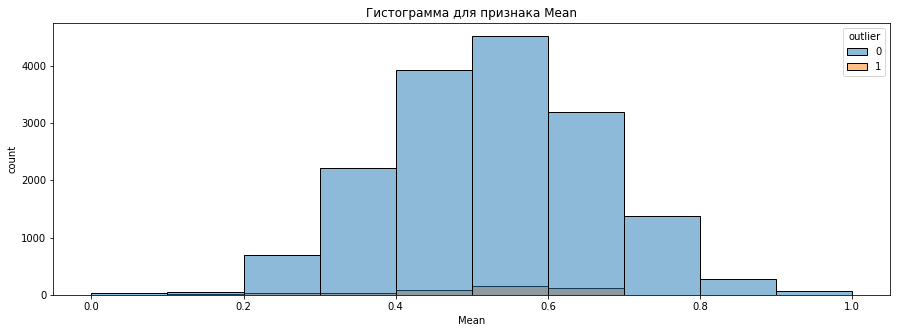

In [ ]:
plot_hist('Mean', data, bins=10, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

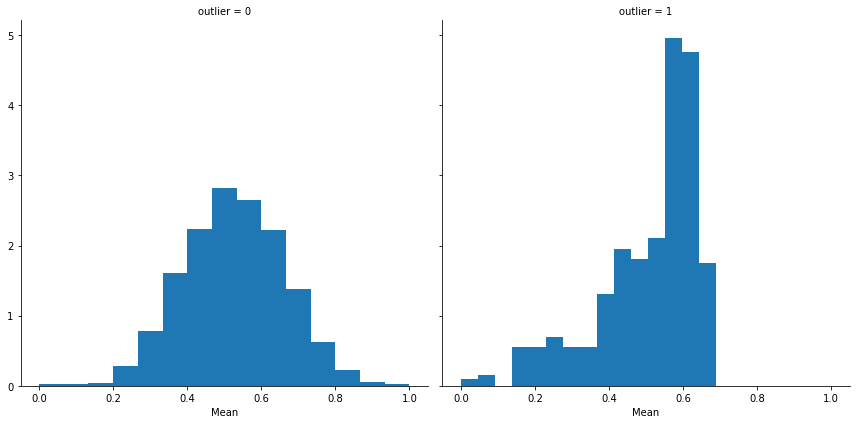

In [ ]:
plot_hist_out('Mean',data)

Значения у таргета 1 обрезаются на примерно на 0.8, а таргет 0 имеет вид нормального распределения

###Median - histogram median

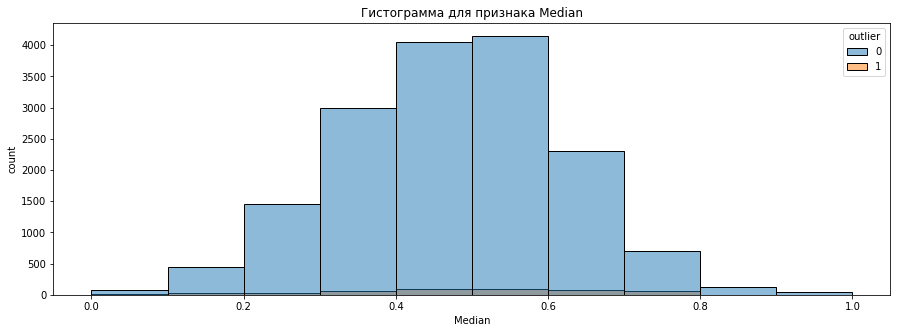

In [ ]:
plot_hist('Median', data, bins=10, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

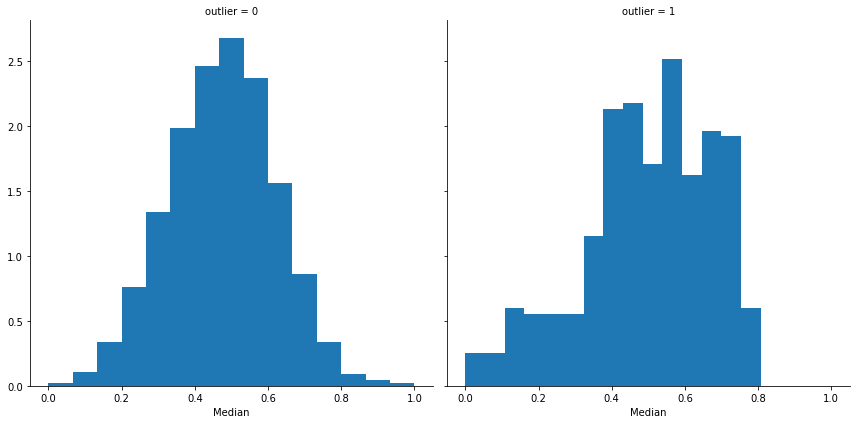

In [ ]:
plot_hist_out('Median',data)

Значения у таргета 1 обрезаются на примерно на 0.8, а таргет 0 имеет вид нормального распределения

###Variance - histogram variance

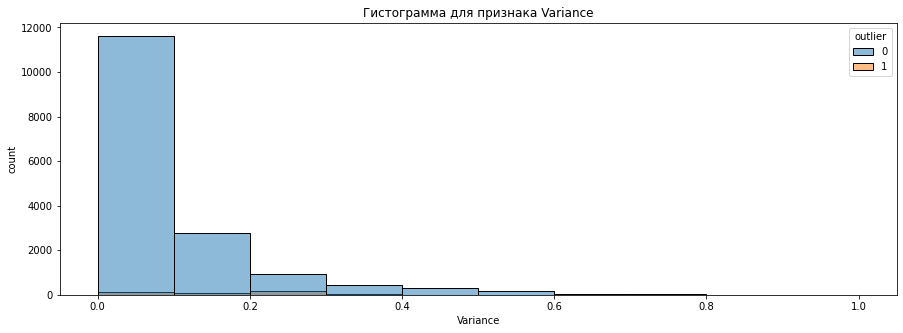

In [ ]:
plot_hist('Variance', data, bins=10, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

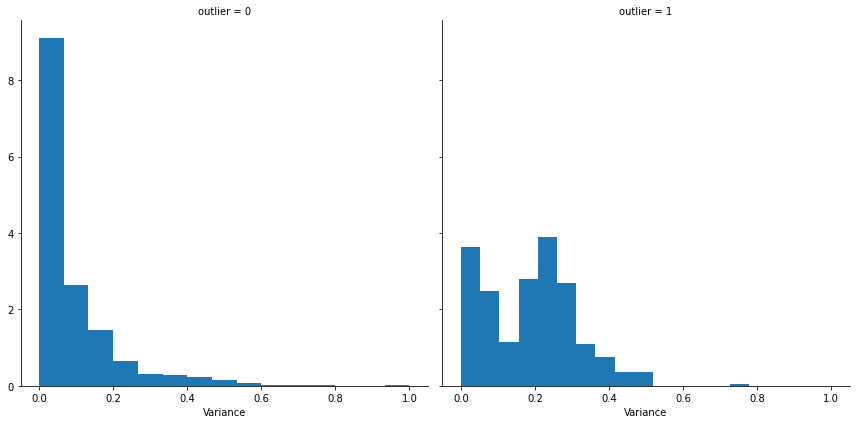

In [ ]:
plot_hist_out('Variance',data)

Видим, что между выборками не наблюдается значимых различий.

###Tendency - histogram tendency

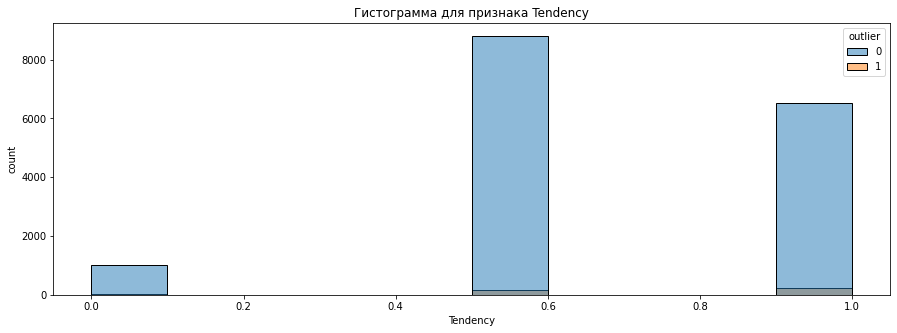

In [ ]:
plot_hist('Tendency', data, bins=10, feat2 = 'outlier')

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 1080x360 with 0 Axes>

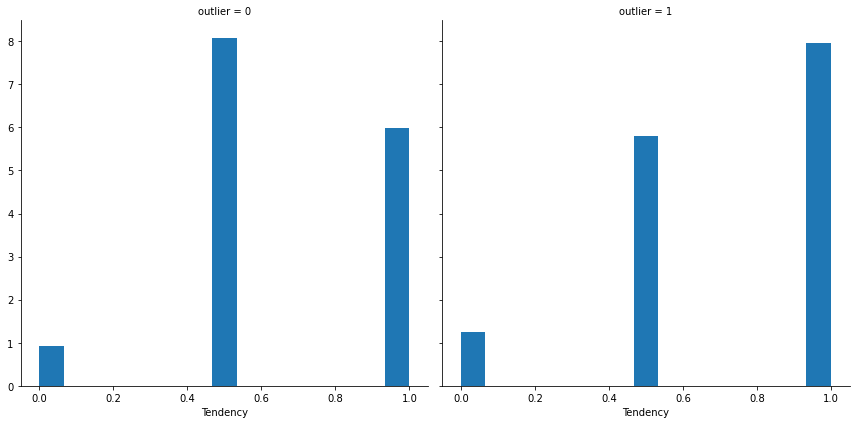

In [ ]:
plot_hist_out('Tendency',data)

Различий между таргетами нет.

##Multivariate analysis

###Pairplot##

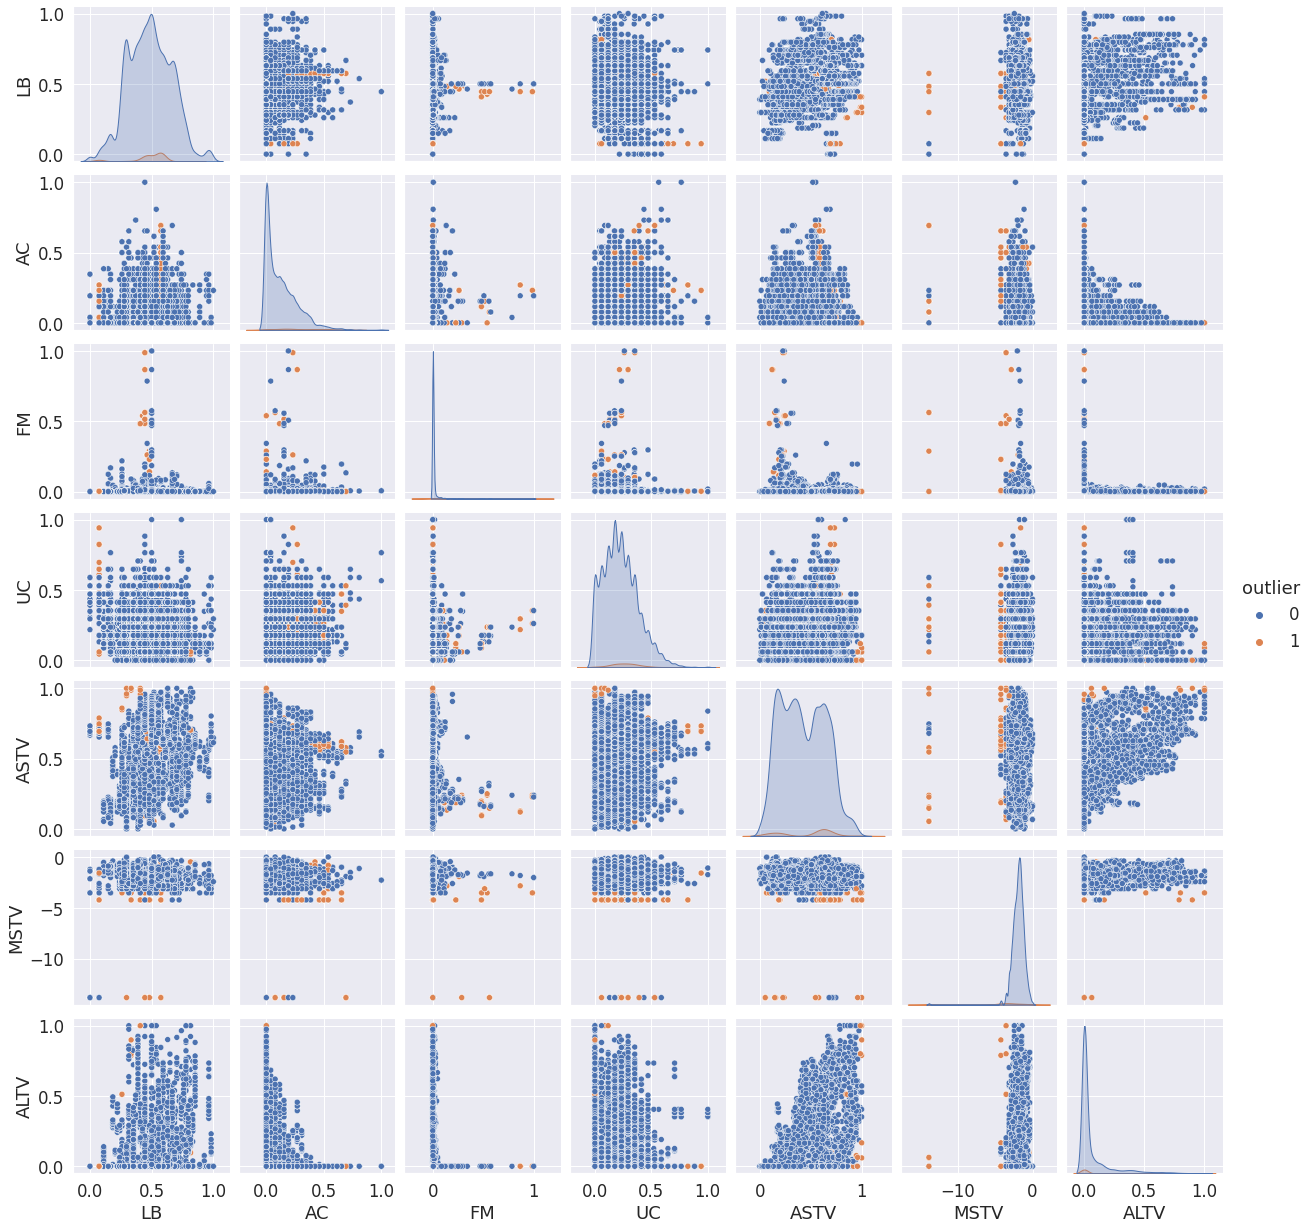

In [ ]:
sns.set(font_scale=1.5)
sns.pairplot(data=data[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV','outlier']],hue='outlier')
plt.show()

##Correlation matrix##

Теперь посмотрим на коэффициенты корреляции между числовыми признаками, с помощью heatmap

Начнем с коэффициентов Пирсона. Создадим heatmap который мы уже видели, когда использовали pandas_profiling

In [ ]:
corr_matrix_pearson_coef = data.corr()

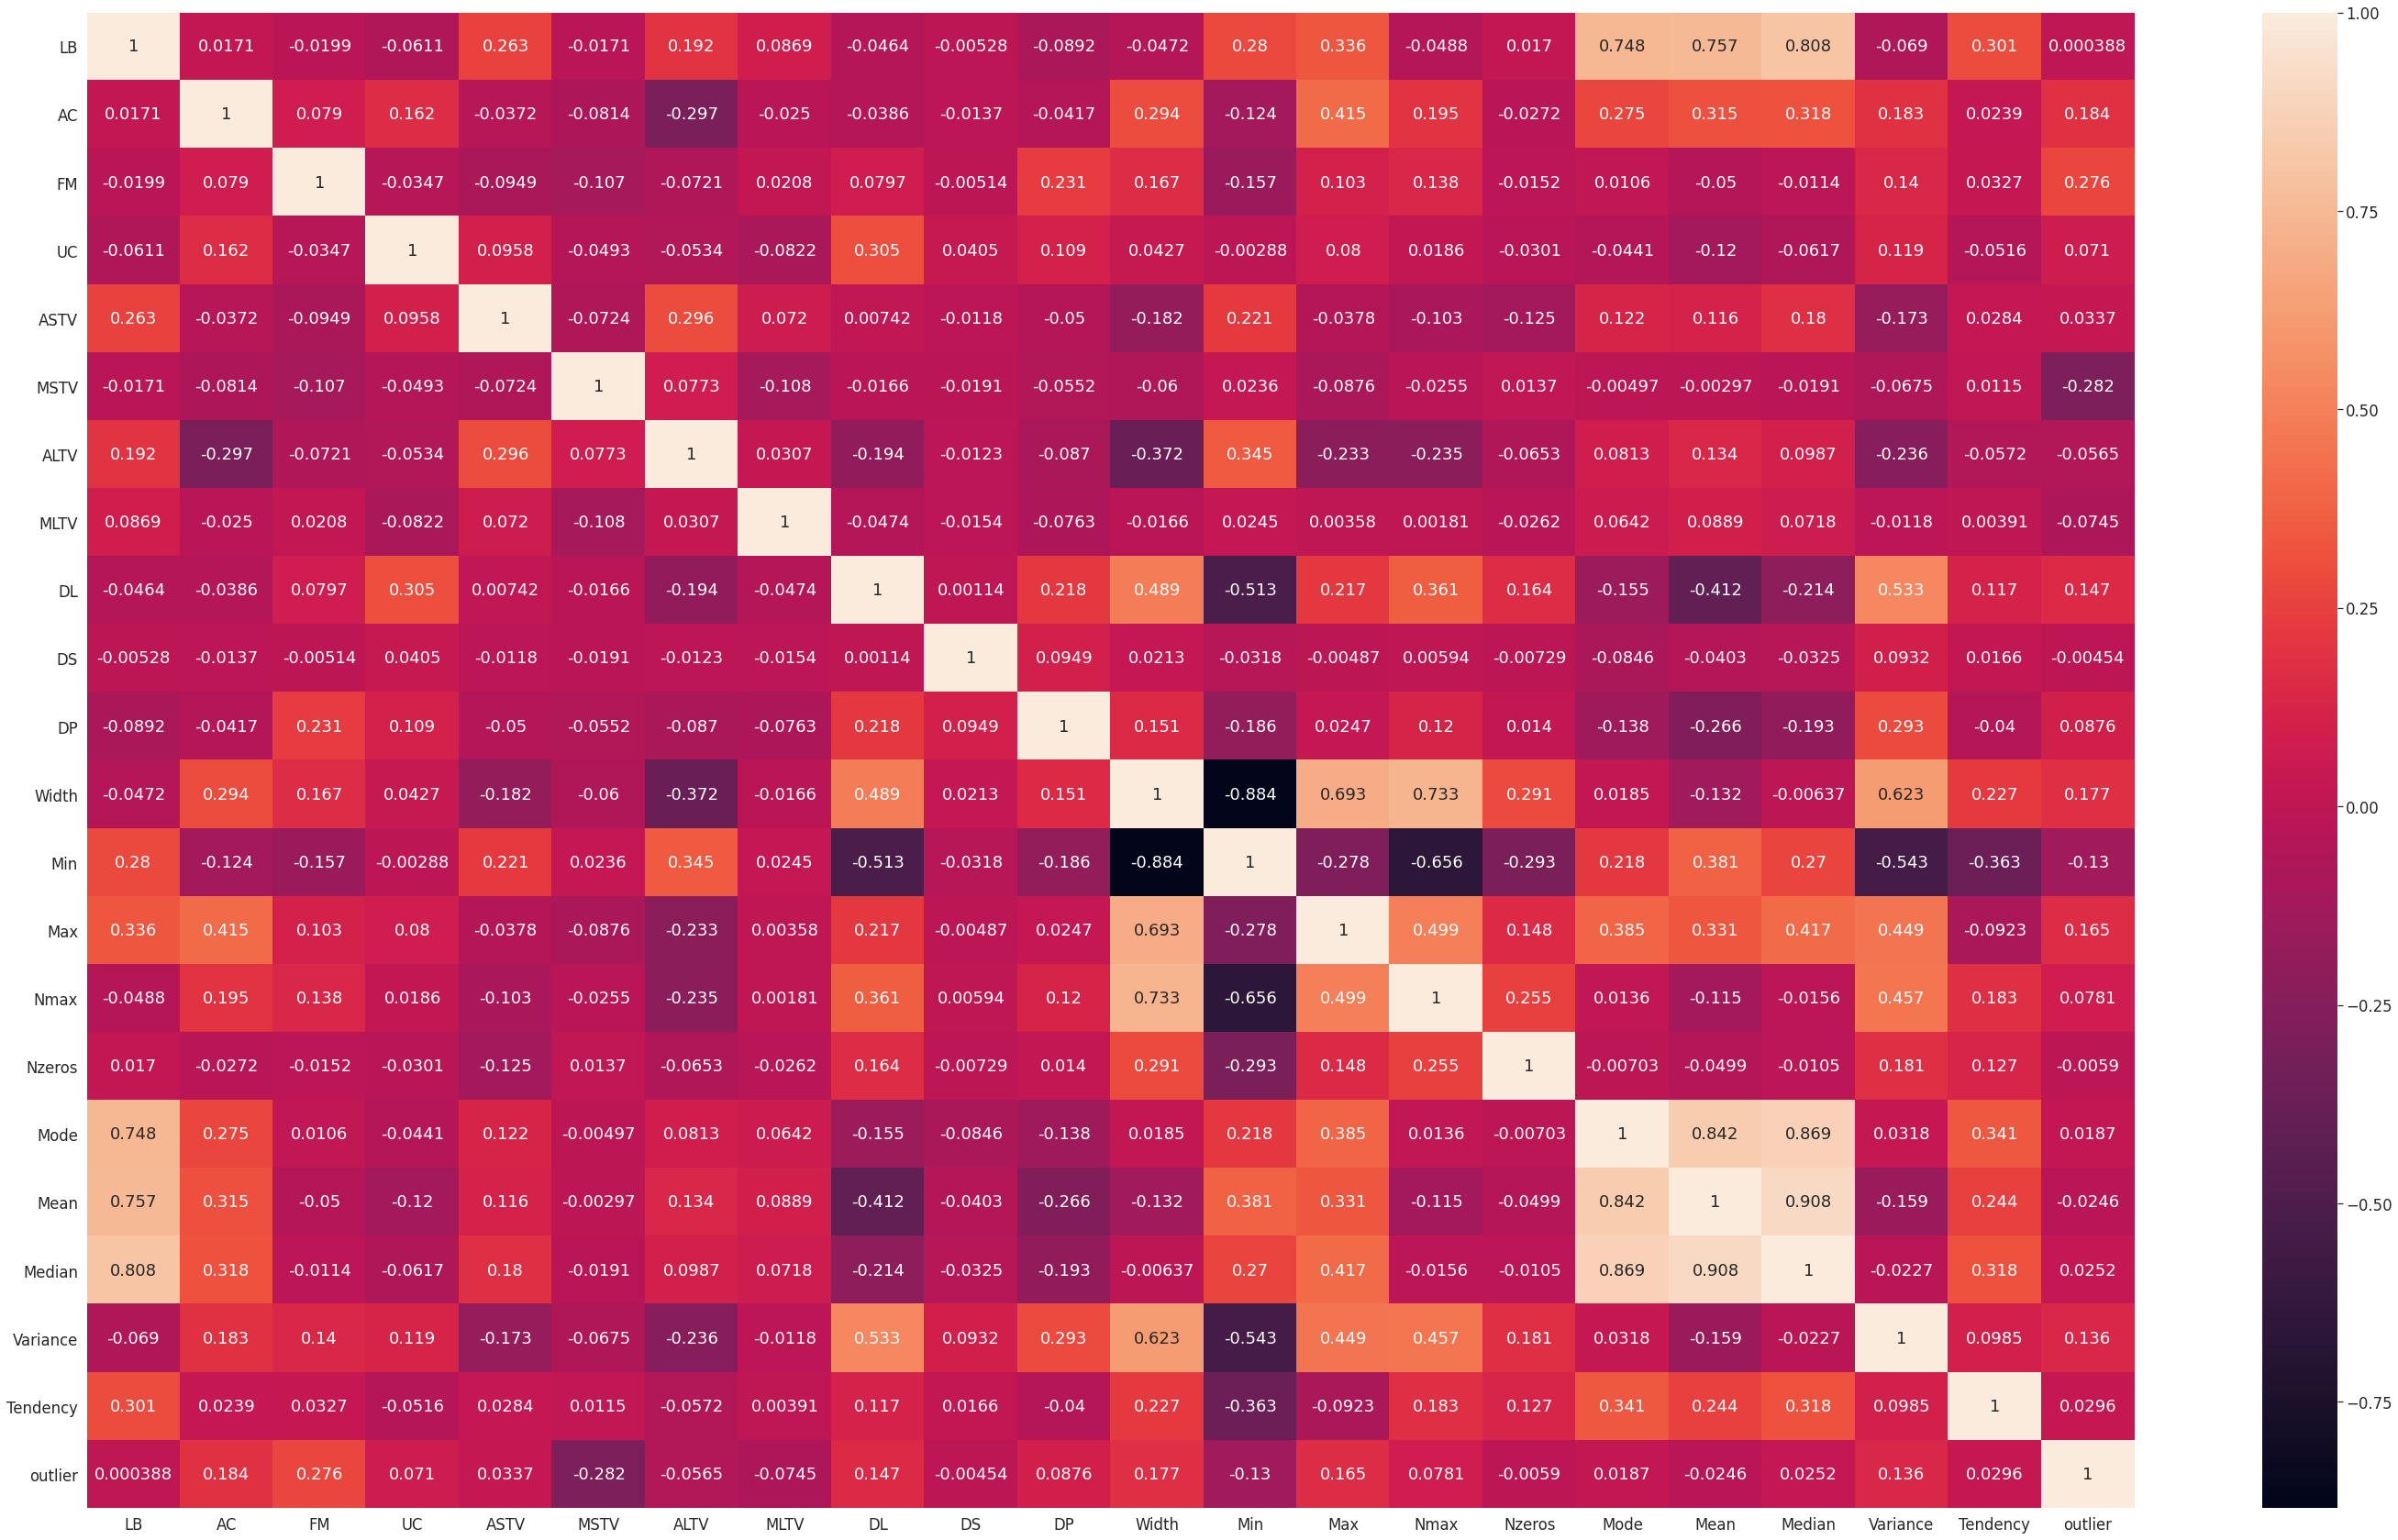

In [ ]:
plt.figure(figsize=(50, 30))
sns.heatmap(corr_matrix_pearson_coef, annot=True, fmt='.3g')
plt.show()

Видно, что имеется сильная линейная зависимость между Mode, Mean и Median, что не удивительно поскольку это статистические характеристики. Также наблюдается связь этих величин с LB. Также отметим связь признака Width с Min, Max и Nmax, что также не удивительно поскольку это тоже своего рода статистические характеристики.

Теперь посмотрим на матрицу коэффициентов Спирмана

In [ ]:
corr_matrix_spearman_coef = data.corr(method='spearman')

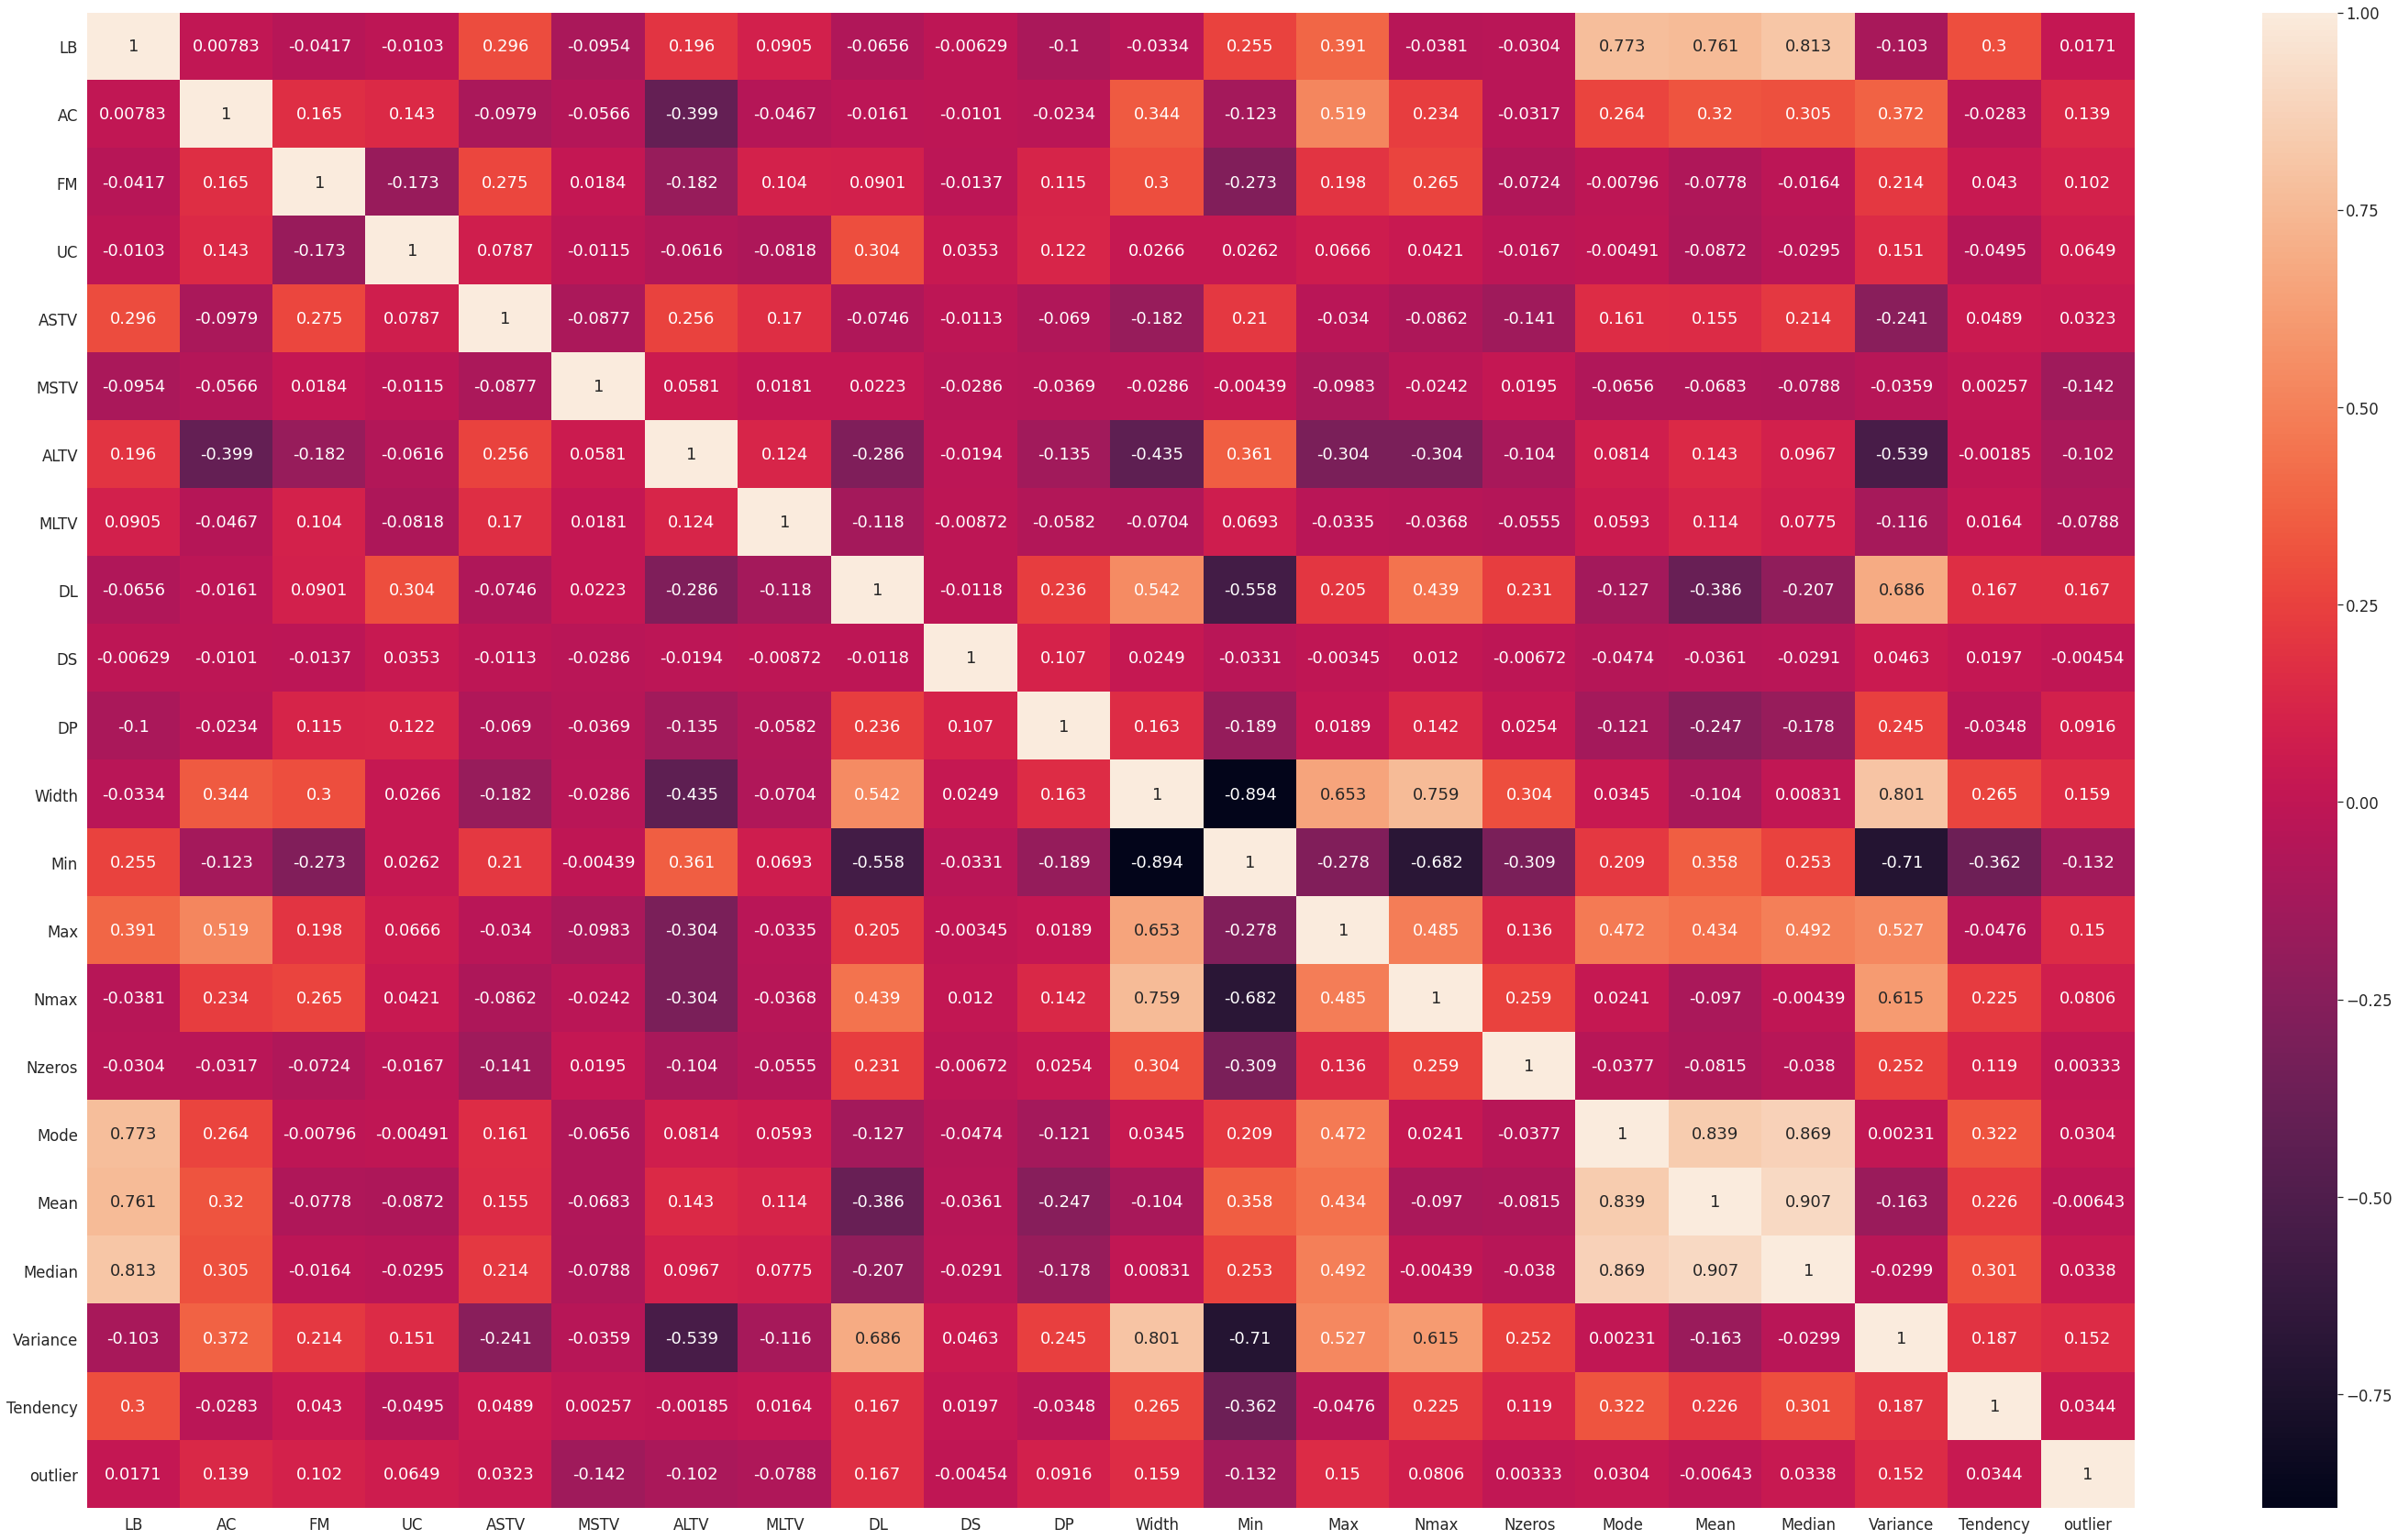

In [ ]:
plt.figure(figsize=(50, 30))
sns.heatmap(corr_matrix_spearman_coef, annot=True, fmt='.3g')
plt.show()

Здесь наблюдаем аналогичную ситуацию представленной выше, но зависимость немного больше. Уберем несколько коррелирующих признаков.

In [ ]:
data=data[['LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS',
           'DP', 'Max', 'Nmax', 'Nzeros','Median','Variance', 'Tendency', 'outlier']]

In [ ]:
scaler=StandardScaler()
X_scaled = scaler.fit_transform(data.drop('outlier',axis=1))

#Mahalanobis rule

In [ ]:
x_data=data.drop('outlier',axis=1)
covariance_inverse = np.linalg.inv(np.cov(x_data.T))
mean_vector = x_data.mean(axis=0)

bias_distance = x_data.apply(lambda row:
                             mahalanobis(mean_vector, row, VI=covariance_inverse), 
                             axis=1)

In [ ]:
from scipy.stats import chi2

In [ ]:
bias_distance.sort_values()

id
1224.0     1.384664
875.0      1.417351
875.0      1.418164
875.0      1.437990
1224.0     1.438907
            ...    
1490.0    36.038083
1489.0    36.064780
1489.0    36.118548
1792.0    37.211021
1793.0    37.247299
Length: 16790, dtype: float64

In [ ]:
dim_reducer = PCA(n_components=2)
x_reduced = dim_reducer.fit_transform(x_data)
x_reduced.shape

(16790, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



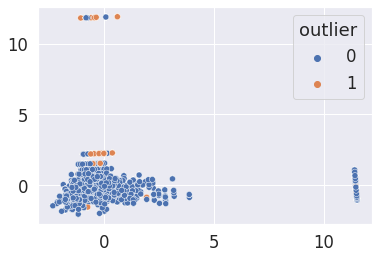

In [ ]:
sns.scatterplot(x_reduced[:,0], x_reduced[:,1], hue=data.outlier)

In [ ]:
predictions = np.ones(x_data.shape[0])
predictions[bias_distance > 5] = -1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



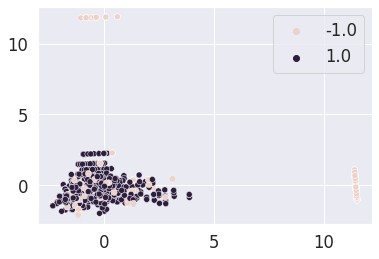

In [ ]:
sns.scatterplot(x_reduced[:,0], x_reduced[:,1], hue=predictions)

In [ ]:
report(data.outlier, predictions)

              precision    recall  f1-score   support

           0       0.99      0.87      0.92     16355
           1       0.09      0.51      0.16       435

    accuracy                           0.86     16790
   macro avg       0.54      0.69      0.54     16790
weighted avg       0.96      0.86      0.90     16790



Модель справилась плохо, так как смогла идентифицировать только половину выбросов.

#Supervised models

##SVM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, data.outlier, random_state=42, shuffle=True, test_size = 0.2, stratify = data.outlier)

In [ ]:
svm_detect = SVC(probability=True)

In [ ]:
svm_detect.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_svm = svm_detect.predict(X_test)

In [ ]:
np.int_(y_test.index)

array([ 456,  816,  227, ...,  627, 2119, 1539])

In [ ]:
print(classification_report(y_test,y_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3271
           1       1.00      0.85      0.92        87

    accuracy                           1.00      3358
   macro avg       1.00      0.93      0.96      3358
weighted avg       1.00      1.00      1.00      3358



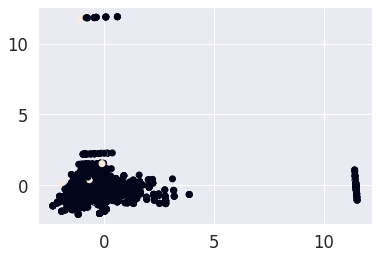

In [ ]:
plt.scatter(x_reduced[np.int_(y_test.index),0], x_reduced[np.int_(y_test.index),1], c=y_svm)

Видим, что SVM намного лучше справился с задачей, хоть этого не показано на графике.

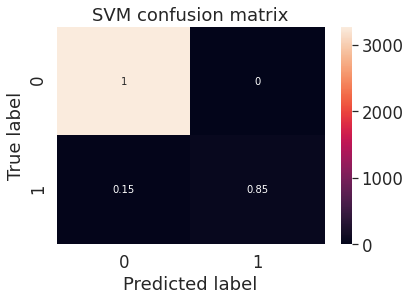

In [ ]:
conf = confusion_matrix(y_test, y_svm, labels=y_test.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=y_test.unique(),
            xticklabels=y_test.unique());
plt.title('SVM confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.9995818354961927


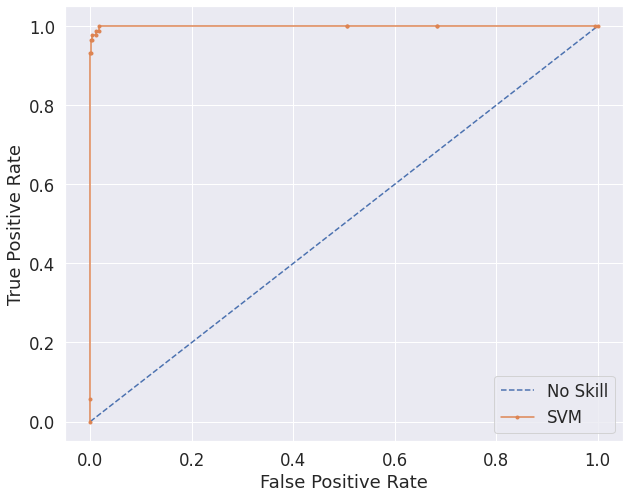

In [ ]:
y_svm_prob = svm_detect.predict_proba(X_test)
calc_and_plot_rocauc(y_svm_prob,y_test,'SVM')

##Logreg

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_logreg = model.predict(X_test)
print(classification_report(y_test,y_logreg))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3271
           1       0.63      0.30      0.41        87

    accuracy                           0.98      3358
   macro avg       0.81      0.65      0.70      3358
weighted avg       0.97      0.98      0.97      3358



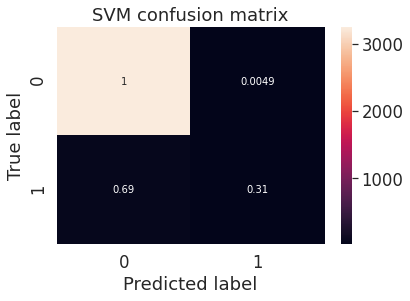

In [ ]:
conf = confusion_matrix(y_test, y_logreg, labels=y_test.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=y_test.unique(),
            xticklabels=y_test.unique());
plt.title('Logreg confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

Данная модель отработала даже хуже, чем Mahalanobis rule, она нашла только 31 процент выбросов.

No Skill: ROC AUC=0.500
Logreg: ROC AUC=0.9179483935806477


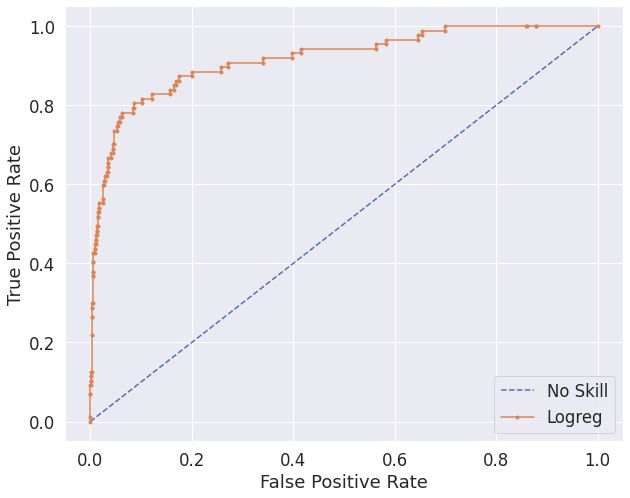

In [ ]:
y_logreg_prob = model.predict_proba(X_test)
calc_and_plot_rocauc(y_logreg_prob,y_test,'Logreg')

##KNN

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_knn = model.predict(X_test)
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3271
           1       0.99      0.95      0.97        87

    accuracy                           1.00      3358
   macro avg       0.99      0.98      0.98      3358
weighted avg       1.00      1.00      1.00      3358



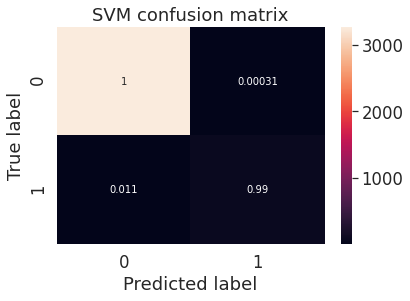

In [ ]:
conf = confusion_matrix(y_test, y_knn, labels=y_test.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=y_test.unique(),
            xticklabels=y_test.unique());
plt.title('KNN confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

Модель на основе алгоритма k ближайших соседей, показала потрясающий результат, она смогла идентифицировать 95 процентов выбросов.

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.9998207866412254


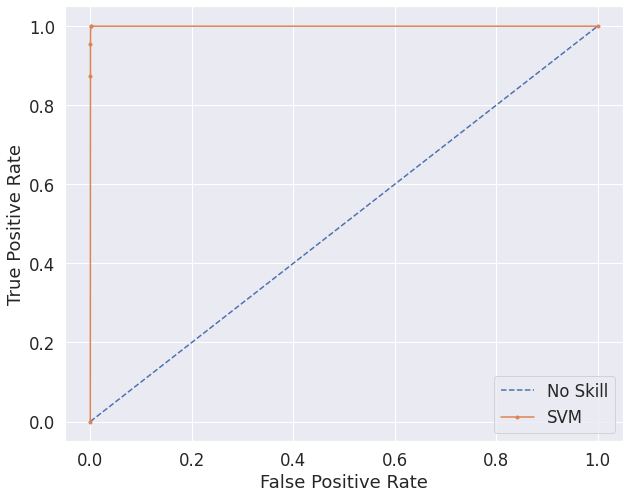

In [ ]:
y_knn_prob = model.predict_proba(X_test)
calc_and_plot_rocauc(y_knn_prob,y_test,'SVM')

##Conclusion

Лучший результат на всех метриках показала модель логистической регрессии. Самыми важными метриками для нас был recall поскольку важно найти все выбросы, и roc-auc.

#Unsupervised learning

##One-class_SVM

In [ ]:
kernel=('linear', 'poly', 'rbf', 'sigmoid')
nu_param_options = np.arange(0.1, 1, 0.1)
param_grid = itertools.product(kernel,nu_param_options)

In [ ]:
params_dict = {}
best_sil_score = 0
params_dict_best_sil_score={}
best_calhar_score = 0
params_dict_best_calhar_score={}

In [ ]:
for param_set in tqdm(param_grid, total=15):
  print(param_set)
  detector = OneClassSVM(kernel=param_set[0],nu=param_set[1])
  y_onesvm = detector.fit_predict(X_scaled)
  sil_score = silhouette_score(X_scaled,y_onesvm)
  calhar_score = calinski_harabasz_score(X_scaled,y_onesvm)
  if best_sil_score < sil_score:
    best_sil_score = sil_score
    params_dict_best_sil_score = param_set
  if best_calhar_score < calhar_score:
    best_calhar_score = calhar_score
    params_dict_best_calhar_score = param_set
  params_dict['{}_{}_{}'.format(len(set(y_onesvm) - set([-1])), param_set[0], param_set[1])] = param_set
  print(param_set)

('linear', 0.1)
('linear', 0.1)
('linear', 0.2)
('linear', 0.2)
('linear', 0.30000000000000004)
('linear', 0.30000000000000004)
('linear', 0.4)
('linear', 0.4)
('linear', 0.5)
('linear', 0.5)
('linear', 0.6)
('linear', 0.6)
('linear', 0.7000000000000001)
('linear', 0.7000000000000001)
('linear', 0.8)
('linear', 0.8)
('linear', 0.9)
('linear', 0.9)
('poly', 0.1)
('poly', 0.1)
('poly', 0.2)
('poly', 0.2)
('poly', 0.30000000000000004)
('poly', 0.30000000000000004)
('poly', 0.4)
('poly', 0.4)
('poly', 0.5)
('poly', 0.5)
('poly', 0.6)
('poly', 0.6)
('poly', 0.7000000000000001)
('poly', 0.7000000000000001)
('poly', 0.8)
('poly', 0.8)
('poly', 0.9)
('poly', 0.9)
('rbf', 0.1)
('rbf', 0.1)
('rbf', 0.2)
('rbf', 0.2)
('rbf', 0.30000000000000004)
('rbf', 0.30000000000000004)
('rbf', 0.4)
('rbf', 0.4)
('rbf', 0.5)
('rbf', 0.5)
('rbf', 0.6)
('rbf', 0.6)
('rbf', 0.7000000000000001)
('rbf', 0.7000000000000001)
('rbf', 0.8)
('rbf', 0.8)
('rbf', 0.9)
('rbf', 0.9)
('sigmoid', 0.1)
('sigmoid', 0.1)
('sigm

In [ ]:
print(params_dict_best_sil_score)
print(best_sil_score)
print(params_dict_best_calhar_score)
print(best_calhar_score)

('poly', 0.9)
0.3656285187345549
('linear', 0.1)
1085.22946192063


In [ ]:
detector = OneClassSVM(kernel='poly',nu=0.9)
y_onesvm_poly = detector.fit_predict(X_scaled)

In [ ]:
report(data.outlier,y_onesvm_poly, 1)

              precision    recall  f1-score   support

           0       0.98      0.91      0.95     16353
           1       0.12      0.47      0.19       435

    accuracy                           0.90     16788
   macro avg       0.55      0.69      0.57     16788
weighted avg       0.96      0.90      0.93     16788



In [ ]:
predictions = y_onesvm_poly.copy()
predictions[y_onesvm_poly != 1] = 0
predictions[y_onesvm_poly == 1] = 1
y_onesvm_poly=predictions.copy()

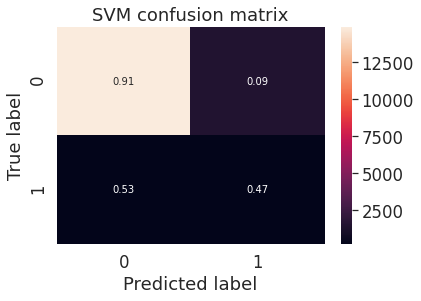

In [ ]:
conf = confusion_matrix(data.outlier, predictions, labels=data.outlier.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=data.outlier.unique(),
            xticklabels=data.outlier.unique());
plt.title('SVM confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
detector = OneClassSVM(kernel='linear',nu=0.1)
y_onesvm_lin = detector.fit_predict(X_scaled)

In [ ]:
report(data.outlier,y_onesvm_lin, 1)

              precision    recall  f1-score   support

           0       0.98      0.71      0.82     16353
           1       0.05      0.55      0.09       435

    accuracy                           0.70     16788
   macro avg       0.52      0.63      0.46     16788
weighted avg       0.96      0.70      0.80     16788



In [ ]:
predictions = y_onesvm_lin.copy()
predictions[y_onesvm_lin != 1] = 0
predictions[y_onesvm_lin == 1] = 1
y_onesvm_lin=predictions.copy()

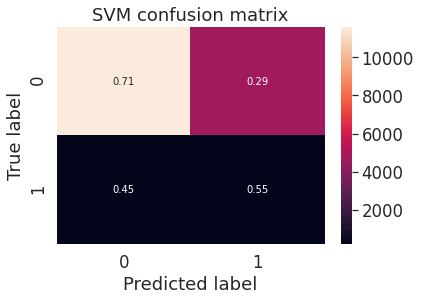

In [ ]:
conf = confusion_matrix(data.outlier, predictions, labels=data.outlier.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=data.outlier.unique(),
            xticklabels=data.outlier.unique());
plt.title('SVM confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

##Isolation Forest

In [ ]:
n_estim_options = np.arange(20, 200, 10)
param_grid = itertools.product(n_estim_options)

In [ ]:
params_dict = {}
best_sil_score = 0
params_dict_best_sil_score={}
best_calhar_score = 0
params_dict_best_calhar_score={}

In [ ]:
for param_set in tqdm(param_grid, total=15):
  print(param_set)
  detector = IsolationForest(n_estimators=param_set[0])
  y_forest = detector.fit_predict(X_scaled)
  sil_score = silhouette_score(X_scaled,y_forest)
  calhar_score = calinski_harabasz_score(X_scaled,y_forest)
  if best_sil_score < sil_score:
    best_sil_score = sil_score
    params_dict_best_sil_score = param_set
  if best_calhar_score < calhar_score:
    best_calhar_score = calhar_score
    params_dict_best_calhar_score = param_set
  print(param_set)

(20,)
(20,)
(30,)
(30,)
(40,)
(40,)
(50,)
(50,)
(60,)
(60,)
(70,)
(70,)
(80,)
(80,)
(90,)
(90,)
(100,)
(100,)
(110,)
(110,)
(120,)
(120,)
(130,)
(130,)
(140,)
(140,)
(150,)
(150,)
(160,)
(160,)
(170,)
(170,)
(180,)
(180,)
(190,)
(190,)



In [ ]:
print(params_dict_best_sil_score)
print(best_sil_score)
print(params_dict_best_calhar_score)
print(best_calhar_score)

(50,)
0.40877849009490136
(110,)
976.9755021684749


In [ ]:
detector = IsolationForest(50)
y_forest_50 = detector.fit_predict(X_scaled)

In [ ]:
report(data.outlier,y_forest_50, -1)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     16353
           1       0.15      0.38      0.22       435

    accuracy                           0.93     16788
   macro avg       0.57      0.66      0.59     16788
weighted avg       0.96      0.93      0.94     16788



In [ ]:
predictions = y_forest_50.copy()
predictions[y_forest_50 != 1] = 1
predictions[y_forest_50 == 1] = 0
y_forest_50=predictions.copy()

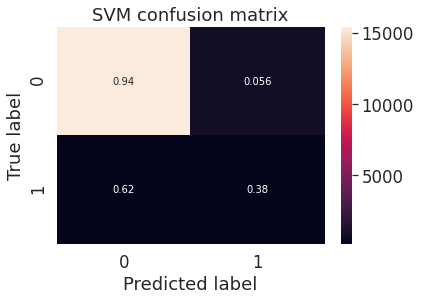

In [ ]:
conf = confusion_matrix(data.outlier, predictions, labels=data.outlier.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=data.outlier.unique(),
            xticklabels=data.outlier.unique());
plt.title('SVM confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

In [ ]:
detector = IsolationForest(110)
y_forest_110= detector.fit_predict(X_scaled)

In [ ]:
report(data.outlier,y_forest_110, -1)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     16353
           1       0.18      0.47      0.26       435

    accuracy                           0.93     16788
   macro avg       0.58      0.71      0.61     16788
weighted avg       0.96      0.93      0.95     16788



In [ ]:
predictions = y_forest_110.copy()
predictions[y_forest_110 != 1] = 1
predictions[y_forest_110 == 1] = 0
y_forest_110=predictions.copy()

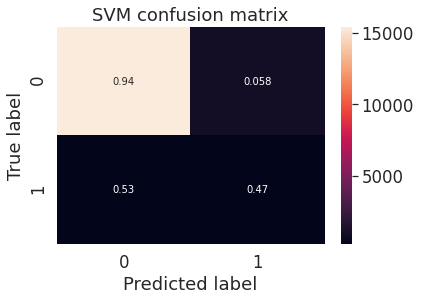

In [ ]:
conf = confusion_matrix(data.outlier, predictions, labels=data.outlier.unique())
sns.heatmap(conf,
            annot=conf/(np.sum(conf,axis=1).reshape((-1, 1))), #normalized by true class sizes
            yticklabels=data.outlier.unique(),
            xticklabels=data.outlier.unique());
plt.title('SVM confusion matrix');
plt.xlabel('Predicted label');
plt.ylabel('True label');

##Conclusion

In [ ]:
result=pd.DataFrame.from_dict({'label_onesvm_lin':y_onesvm_lin,
                     'label_onesvm_poly':y_onesvm_poly,
                     'label_forest_50':y_forest_50,
                     'label_forest_110':y_forest_110})

In [ ]:
result

,label_onesvm_lin,label_onesvm_poly,label_forest_50,label_forest_110
0,0,1,0,0
1,0,0,0,1
2,0,1,0,0
3,0,0,1,1
4,0,1,1,1
...,...,...,...,...
16783,0,0,0,0
16784,0,0,0,0
16785,0,0,0,0
16786,0,0,0,0


In [ ]:
label_cols = ['label_onesvm_lin','label_onesvm_poly','label_forest_50','label_forest_110']

In [ ]:
for col in label_cols:
    print(f'Adjusted MI score for {col} = {adjusted_mutual_info_score(data.outlier, result[col])}')

Adjusted MI score for label_onesvm_lin = 0.009885573239159964
Adjusted MI score for label_onesvm_poly = 0.05375207973793992
Adjusted MI score for label_forest_50 = 0.06430725047585722
Adjusted MI score for label_forest_110 = 0.09116313455157937


In [ ]:
for col in label_cols:
    print(f'Adjusted rand score for {col} = {adjusted_rand_score(data.outlier, result[col])}')

Adjusted rand score for label_onesvm_lin = 0.02417008492408063
Adjusted rand score for label_onesvm_poly = 0.13985638587225904
Adjusted rand score for label_forest_50 = 0.1745839450421794
Adjusted rand score for label_forest_110 = 0.21344475114454797


In [ ]:
for col in label_cols:
    print(f'Calinsky-Harabaz score for {col} = {calinski_harabasz_score(X_scaled, result[col])}')

Calinsky-Harabaz score for label_onesvm_lin = 1085.22946192063
Calinsky-Harabaz score for label_onesvm_poly = 638.2119204093189
Calinsky-Harabaz score for label_forest_50 = 680.1268085249641
Calinsky-Harabaz score for label_forest_110 = 670.1188564448515


In [ ]:
for col in label_cols:
    print(f'Silhouette score for {col} = {silhouette_score(X_scaled, result[col])}')

Silhouette score for label_onesvm_lin = 0.12327410335975035
Silhouette score for label_onesvm_poly = 0.3656285187345549
Silhouette score for label_forest_50 = 0.38183198338627716
Silhouette score for label_forest_110 = 0.3982270538614948


Если посмотреть на результаты классических метрик, то лучше показали себя модели Isolation Forest, за исключением метрики Calinsky-Harabaz. Но если посмотреть выше на результаты recall для выбросов, то очевидное преимущество имеет onesvm с линейным ядром, поскольку лучше находит выбросы, у него есть проблемы с нахождением нормальных значений, но это не критично поскольку основная задача это найти выбросы